c)	Use the Income Classification dataset from below Kaggle link and create an end to end project on Jupyter/Colab.

https://www.kaggle.com/datasets/lodetomasi1995/income-classification/data


i.	Download the dataset from above link and load it into your Python environment.
ii.	Perform the EDA and do the visualizations.
iii.	Check the distributions/skewness in the variables and do the transformations if required.
iv.	Check/Treat the outliers and do the feature scaling if required.
v.	Create a ML model to predict the Income based on the specifications given.
vi.	Check for overfitting and treat them accordingly.
vii.	Use all the Supervised ML algorithms (DT, RF, SVM, XGBoost etc.) and compare the performances to get the best model.


# Income Prediction Model
**Problem Statemen**t:
To create a model using the "income-evaluation" dataset to predict whether an individual has income higher than 50K depending on the variables like Age, Occupation,Education, MArital status,native country ,etc.It is a classification problem so we will use algoritims like logistic Regression, Decision Tree, Randomforest etc,.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import xgboost as xgb
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Check whether there is any null value
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [5]:
df.duplicated().sum()

24

In [6]:
df.loc[df.duplicated()].head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
df.drop_duplicates(inplace=True)
df.shape # After removing duplicate values

(32537, 15)

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
age,32537.00,38.59,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32537.00,189780.85,105556.47,12285.00,117827.00,178356.00,236993.00,1484705.00
education-num,32537.00,10.08,2.57,1.00,9.00,10.00,12.00,16.00
capital-gain,32537.00,1078.44,7387.96,0.00,0.00,0.00,0.00,99999.00
capital-loss,32537.00,87.37,403.10,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32537.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [9]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('-', ' ')
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education num',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'capital gain', 'capital loss', 'hours per week', 'native country',
       'income'],
      dtype='object')

In [11]:
df.columns = [col[0].upper() + col[1:] for col in df.columns]
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education num',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Hours per week', 'Native country',
       'Income'],
      dtype='object')

In [12]:
#Removing'-' from all column values as its present in all dataset
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('-', ' ')





Seperating Categorical and numeric variables

In [13]:
num = [fea for fea in df.columns if df[fea].dtypes !='object']
num
numdata = df[num] # here dataframe of object type catagorical data
numdata

,Age,Fnlwgt,Education num,Capital gain,Capital loss,Hours per week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [14]:
cat= [fea for fea in df.columns if df[fea].dtypes =='object']
cat
catdata = df[cat] # here dataframe of object type catagorical data
catdata

,Workclass,Education,Marital status,Occupation,Relationship,Race,Sex,Native country,Income
0,State gov,Bachelors,Never married,Adm clerical,Not in family,White,Male,United States,<=50K
1,Self emp not inc,Bachelors,Married civ spouse,Exec managerial,Husband,White,Male,United States,<=50K
2,Private,HS grad,Divorced,Handlers cleaners,Not in family,White,Male,United States,<=50K
3,Private,11th,Married civ spouse,Handlers cleaners,Husband,Black,Male,United States,<=50K
4,Private,Bachelors,Married civ spouse,Prof specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc acdm,Married civ spouse,Tech support,Wife,White,Female,United States,<=50K
32557,Private,HS grad,Married civ spouse,Machine op inspct,Husband,White,Male,United States,>50K
32558,Private,HS grad,Widowed,Adm clerical,Unmarried,White,Female,United States,<=50K
32559,Private,HS grad,Never married,Adm clerical,Own child,White,Male,United States,<=50K


In [15]:
df['Education'].value_counts()

,count
Education,
HS grad,10494
Some college,7282
Bachelors,5353
Masters,1722
Assoc voc,1382
11th,1175
Assoc acdm,1067
10th,933
7th 8th,645


In [16]:
df['Education num'].value_counts()

,count
Education num,
9,10494
10,7282
13,5353
14,1722
11,1382
7,1175
12,1067
6,933
4,645


In [17]:
df.groupby('Education num')['Education'].value_counts()

,,count
Education num,Education,
1,Preschool,50
2,1st 4th,166
3,5th 6th,332
4,7th 8th,645
5,9th,514
6,10th,933
7,11th,1175
8,12th,433
9,HS grad,10494


Observation: In above result it is apparent that 'Education' and 'Education num' both are referring to same values so we can drop the variable.

In [18]:
df['Income'].value_counts()

,count
Income,
<=50K,24698
>50K,7839


In [19]:
df['Fnlwgt'].value_counts()


,count
Fnlwgt,
164190,13
123011,13
203488,13
148995,12
113364,12
...,...
138342,1
158040,1
232784,1


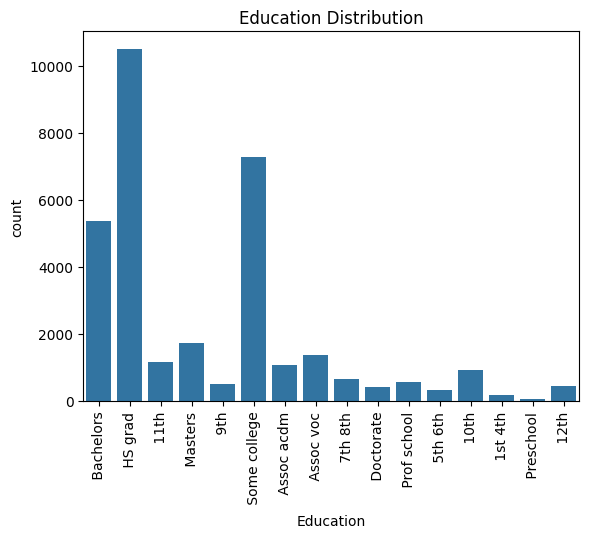

In [20]:
sns.countplot(data=df, x='Education')
plt.title('Education Distribution')
plt.xticks(rotation=90)
plt.show()


**Observation**: From above distribution, High School graduates are more in number than Masters, or post graduates or doctorates, depicting that more people start working after high school.

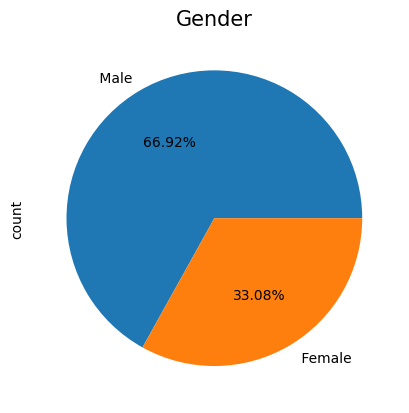

In [21]:
df['Sex'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Gender',fontsize=15)
plt.show()

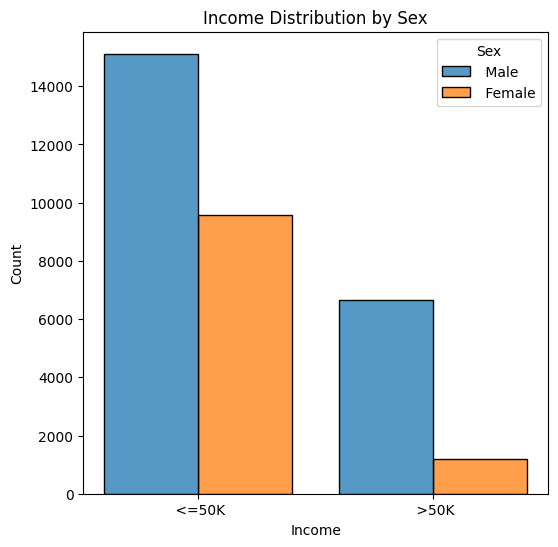

In [22]:

plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='Income', hue='Sex', multiple='dodge', shrink=0.8)
plt.title('Income Distribution by Sex')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In case of gender,it is observed that 'Males' have higher percentage than 'Females' in both the categories of income distribution.

In [23]:
df.Workclass.value_counts()

,count
Workclass,
Private,22673
Self emp not inc,2540
Local gov,2093
?,1836
State gov,1298
Self emp inc,1116
Federal gov,960
Without pay,14
Never worked,7


**Observation**: More people are interested in private jobs then gov jobs, 14 people are working without pay and 7 people have never worked.

<Axes: xlabel='Race'>

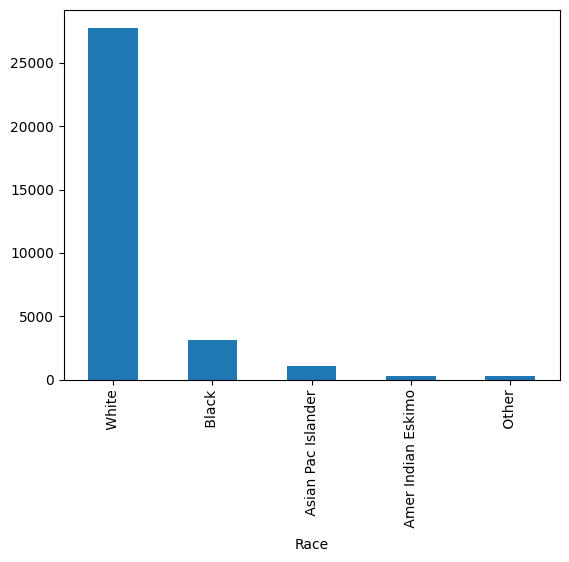

In [24]:
df['Race'].value_counts().plot(kind='bar')

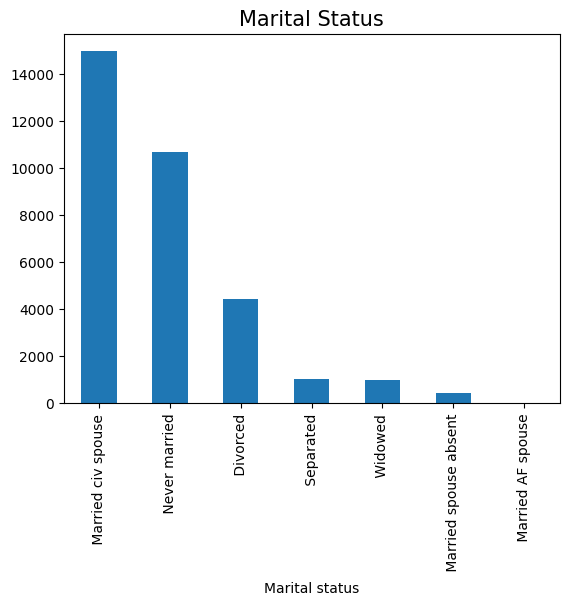

In [25]:
df['Marital status'].value_counts().plot(kind='bar')
plt.title('Marital Status',fontsize=15)
plt.show()

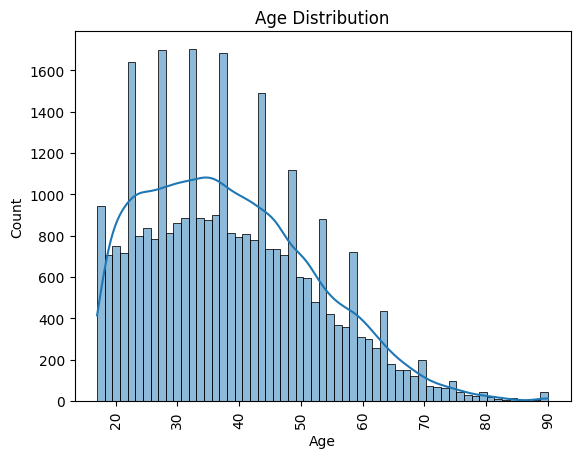

In [26]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xticks(rotation=90)
plt.show()

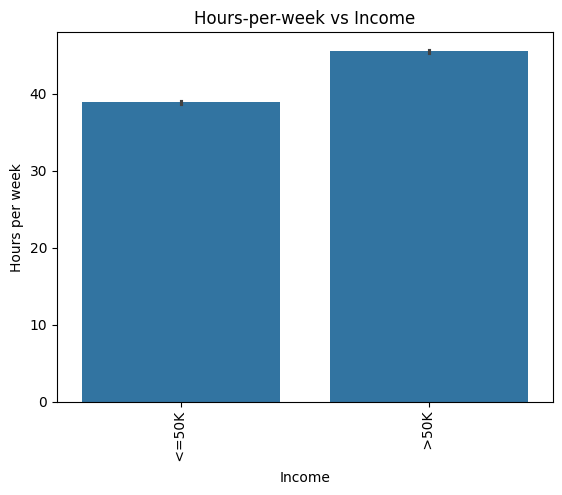

In [27]:
sns.barplot(x='Income', y='Hours per week', data=df)
plt.title('Hours-per-week vs Income')
plt.xticks(rotation=90)
plt.show()

In [28]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education num',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Hours per week', 'Native country',
       'Income'],
      dtype='object')

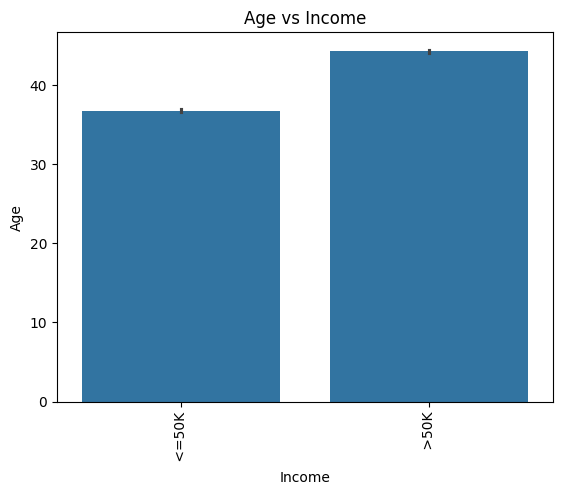

In [29]:
sns.barplot(x='Income', y='Age', data=df)
plt.title('Age vs Income')
plt.xticks(rotation=90)
plt.show()

In [30]:
df['Occupation'].value_counts()

,count
Occupation,
Prof specialty,4136
Craft repair,4094
Exec managerial,4065
Adm clerical,3768
Sales,3650
Other service,3291
Machine op inspct,2000
?,1843
Transport moving,1597


In [31]:
df.shape

(32537, 15)

In [32]:

df['Occupation'] = df['Occupation'].replace(' ?', 'Unknown')
df['Occupation'].value_counts()

,count
Occupation,
Prof specialty,4136
Craft repair,4094
Exec managerial,4065
Adm clerical,3768
Sales,3650
Other service,3291
Machine op inspct,2000
Unknown,1843
Transport moving,1597


In [33]:

# Many columns have '?' value,replacing '?' with 'unknown' in all columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(' ?', 'unknown')


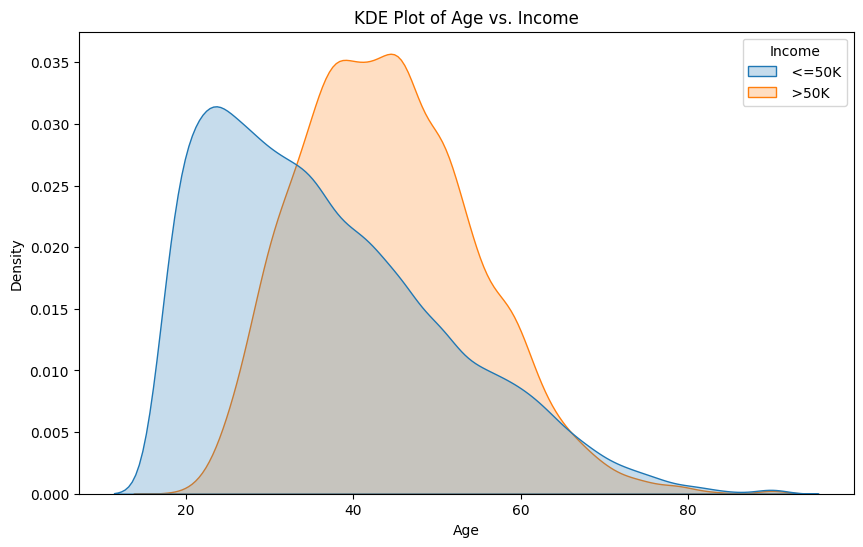

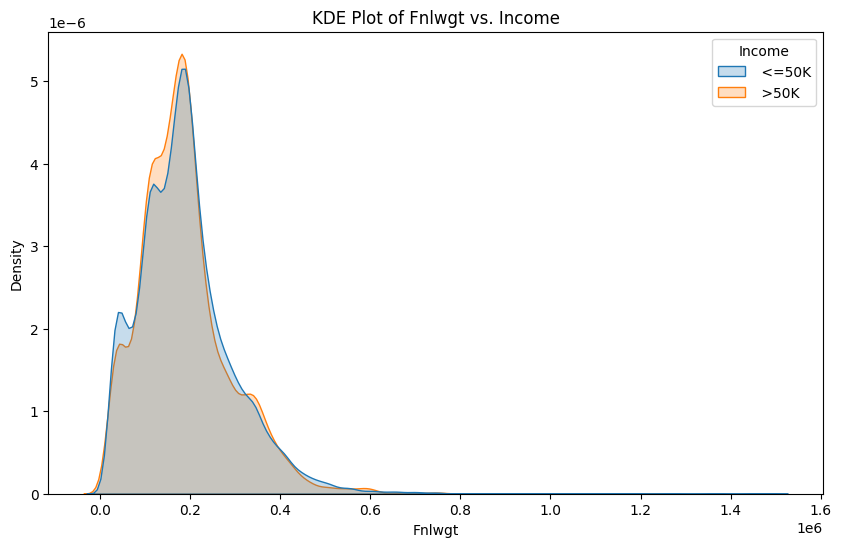

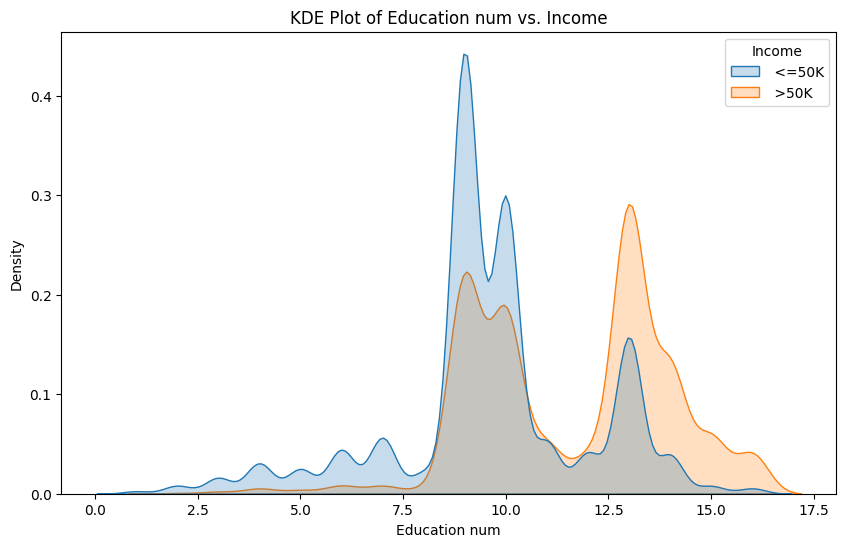

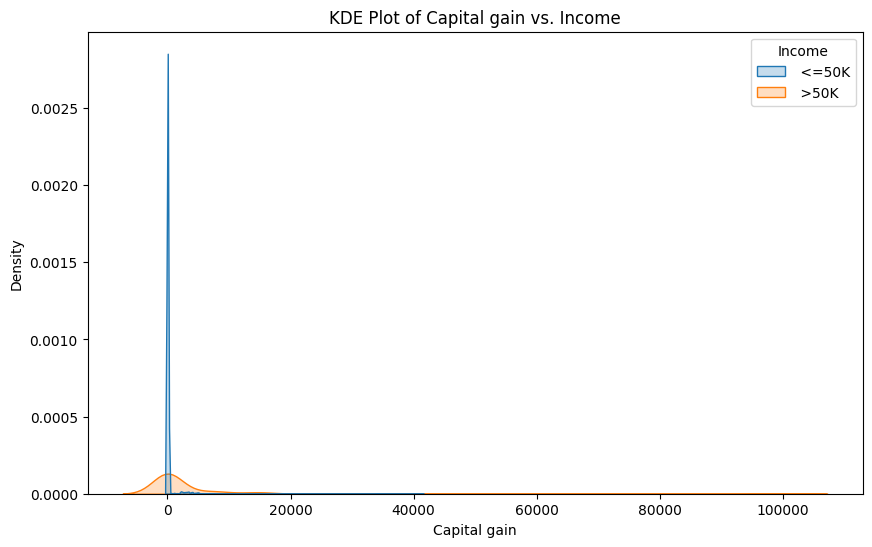

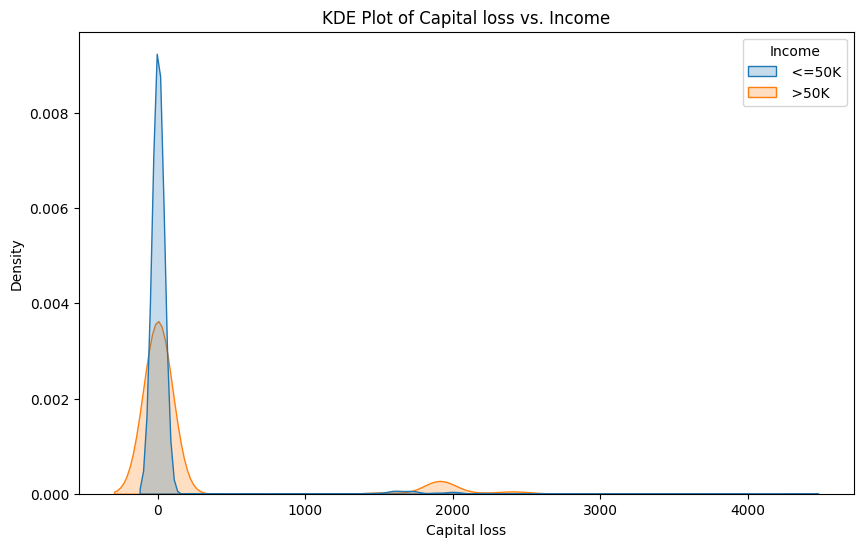

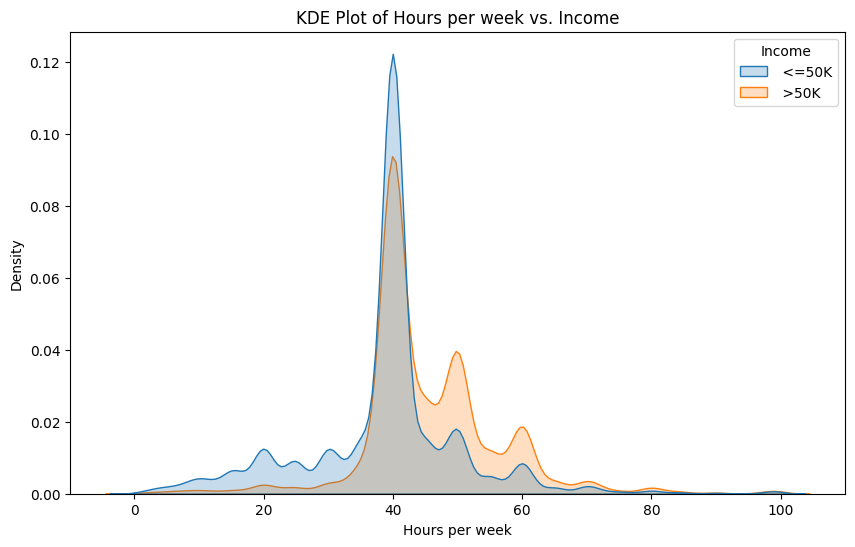

In [34]:

for col in numdata:
    if col != 'Income':
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x=col, hue='Income', fill=True, common_norm=False)
        plt.title(f'KDE Plot of {col} vs. Income')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()


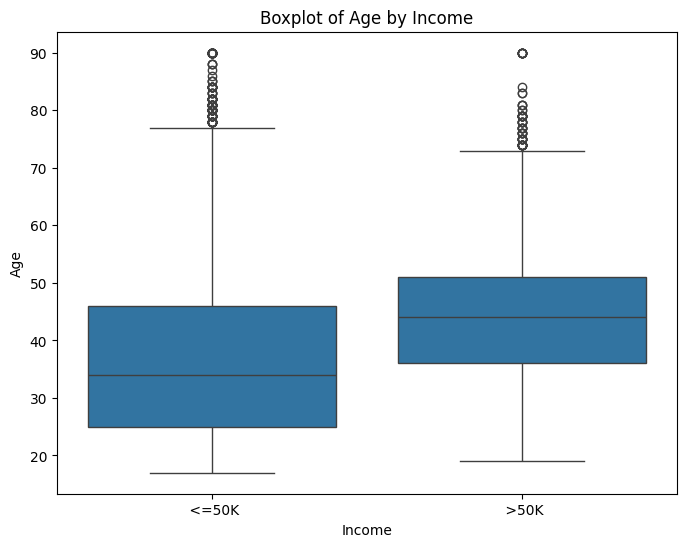

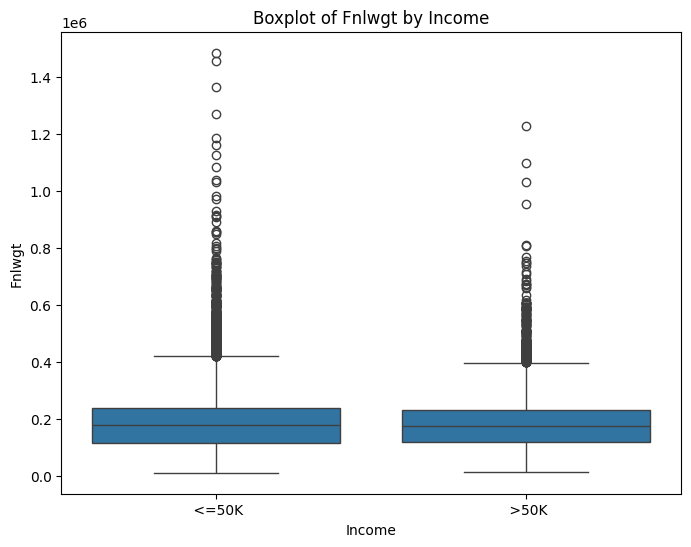

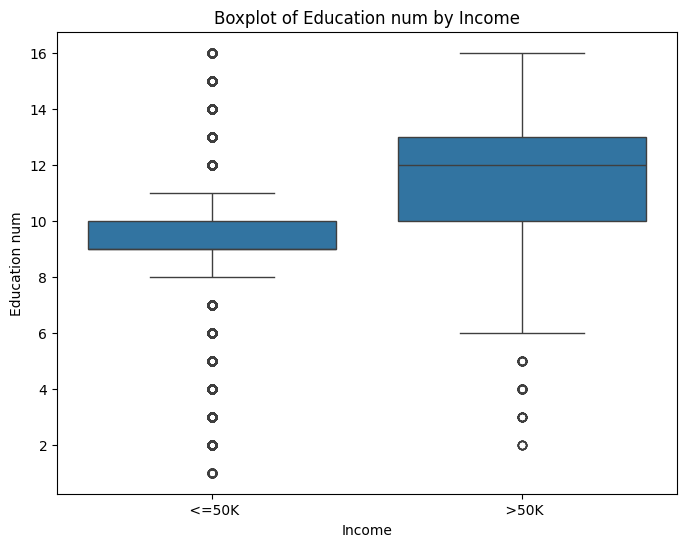

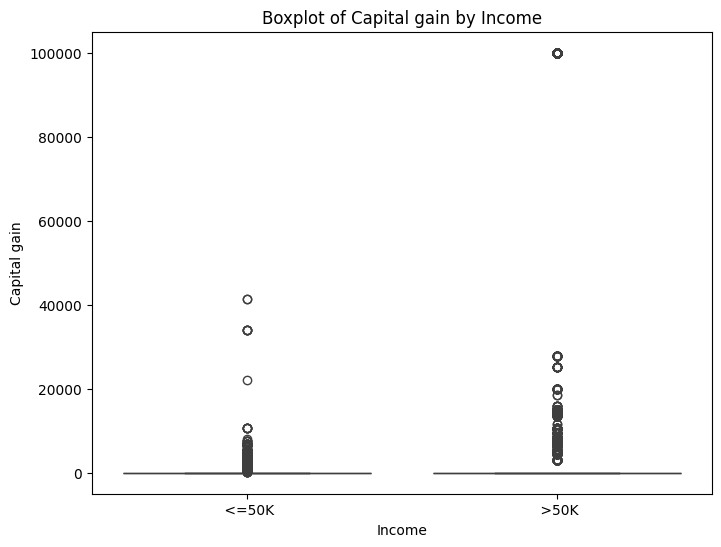

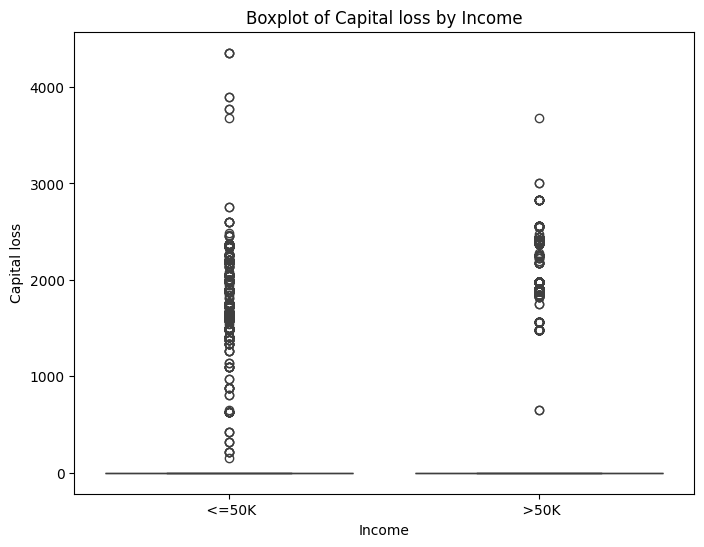

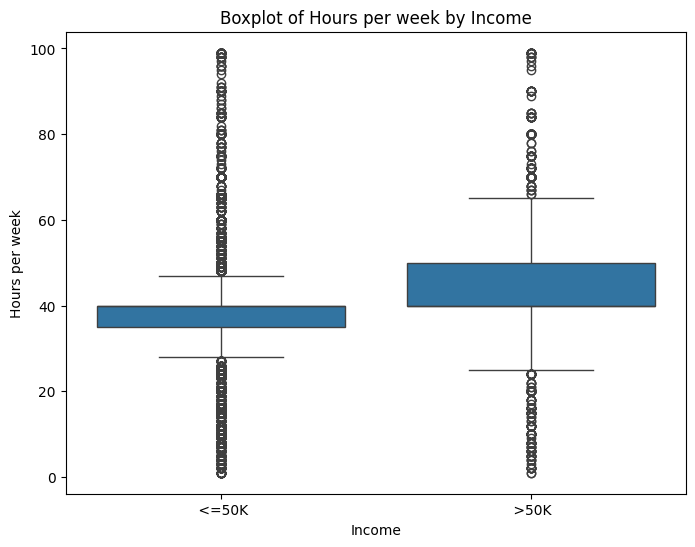

In [35]:
# boxplots for all numerical features
for col in numdata:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Income', y=col, data=df)
    plt.title(f'Boxplot of {col} by Income')
    plt.show()


In [36]:
numdata.corr()

,Age,Fnlwgt,Education num,Capital gain,Capital loss,Hours per week
Age,1.00,-0.08,0.04,0.08,0.06,0.07
Fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02
Education num,0.04,-0.04,1.00,0.12,0.08,0.15
Capital gain,0.08,0.00,0.12,1.00,-0.03,0.08
Capital loss,0.06,-0.01,0.08,-0.03,1.00,0.05
Hours per week,0.07,-0.02,0.15,0.08,0.05,1.00


In [37]:
df2=df.copy()#First creating a copy before altering dataset

# Convert categorical data to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catdata.columns:
    df2[col] = le.fit_transform(df2[col])


In [38]:
df2.sample(5)

,Age,Workclass,Fnlwgt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
32356,23,3,133355,15,10,4,0,3,4,1,0,0,15,38,0
13344,20,3,206681,2,8,4,11,1,4,0,0,0,55,38,0
20091,27,6,23740,11,9,4,13,1,0,1,0,0,38,38,1
28078,58,3,103540,5,4,2,13,0,2,1,0,0,40,38,0
19095,40,3,149466,11,9,0,5,1,2,1,0,0,35,38,0


In [39]:
df2.corr()

,Age,Workclass,Fnlwgt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
Age,1.00,0.06,-0.08,-0.01,0.04,-0.27,0.01,-0.26,0.03,0.09,0.08,0.06,0.07,-0.00,0.23
Workclass,0.06,1.00,-0.02,-0.02,-0.05,0.04,0.31,0.01,0.02,0.00,0.01,-0.01,-0.09,0.00,-0.06
Fnlwgt,-0.08,-0.02,1.00,-0.03,-0.04,0.03,-0.00,0.01,-0.02,0.03,0.00,-0.01,-0.02,-0.06,-0.01
Education,-0.01,-0.02,-0.03,1.00,0.36,-0.04,-0.05,-0.01,0.01,-0.03,0.03,0.02,0.06,0.07,0.08
Education num,0.04,-0.05,-0.04,0.36,1.00,-0.07,0.04,-0.09,0.03,0.01,0.12,0.08,0.15,0.09,0.34
Marital status,-0.27,0.04,0.03,-0.04,-0.07,1.00,0.05,0.19,-0.07,-0.13,-0.04,-0.03,-0.19,-0.02,-0.20
Occupation,0.01,0.31,-0.00,-0.05,0.04,0.05,1.00,-0.01,-0.01,0.03,0.01,0.00,-0.06,-0.00,0.01
Relationship,-0.26,0.01,0.01,-0.01,-0.09,0.19,-0.01,1.00,-0.12,-0.58,-0.06,-0.06,-0.25,-0.01,-0.25
Race,0.03,0.02,-0.02,0.01,0.03,-0.07,-0.01,-0.12,1.00,0.09,0.01,0.02,0.04,0.11,0.07
Sex,0.09,0.00,0.03,-0.03,0.01,-0.13,0.03,-0.58,0.09,1.00,0.05,0.05,0.23,0.00,0.22


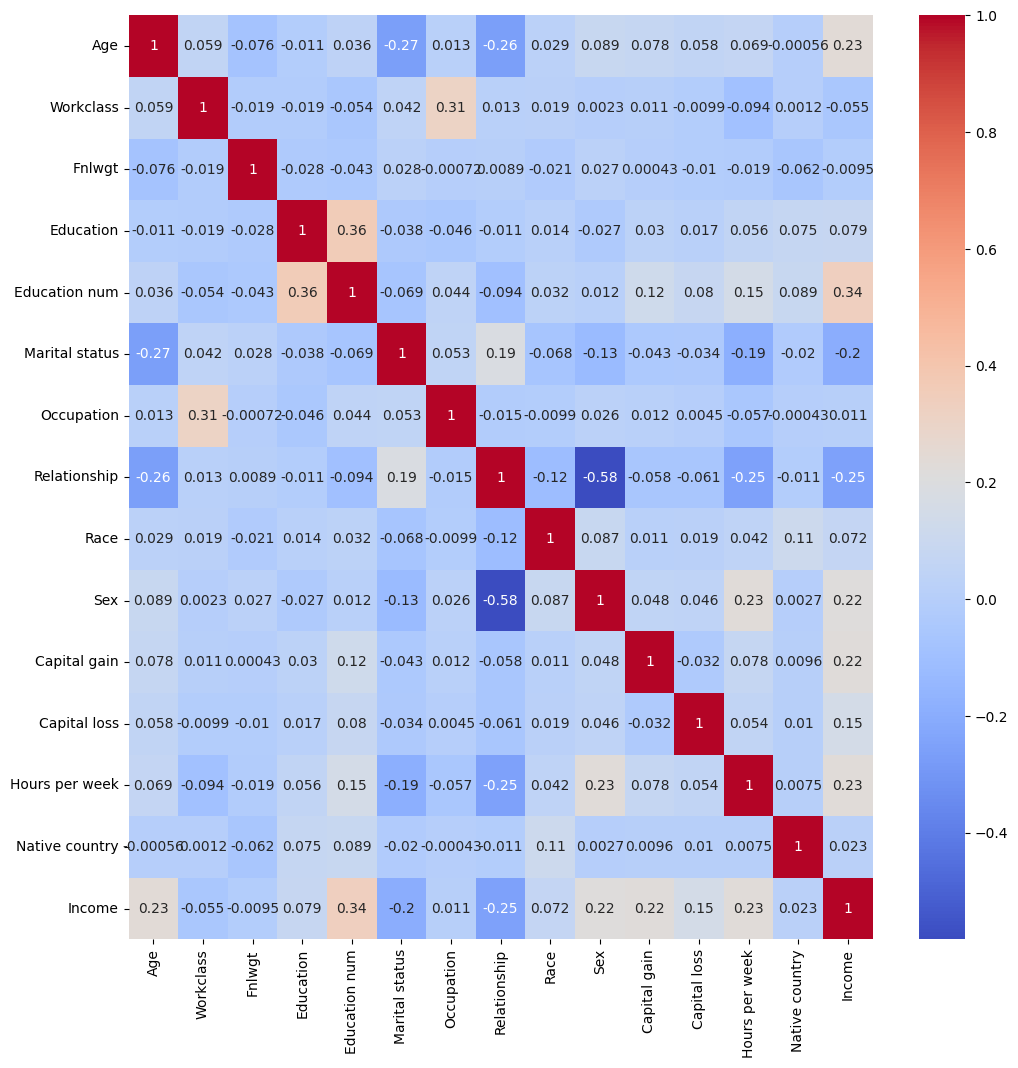

In [40]:
Correlation_matrix=df2.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(Correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [41]:
corr_matrix = df2.corr()
def categorize_correlation(corr_value):
    if corr_value >= 0.5:
        return 'Strong'
    elif corr_value >= 0.3:
        return 'Moderate'
    else:
        return 'Low'


categorized_corr = corr_matrix.applymap(categorize_correlation)
print("\nCategorized Correlation Matrix:")
#print(categorized_corr)
categorized_corr


Categorized Correlation Matrix:


,Age,Workclass,Fnlwgt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
Age,Strong,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
Workclass,Low,Strong,Low,Low,Low,Low,Moderate,Low,Low,Low,Low,Low,Low,Low,Low
Fnlwgt,Low,Low,Strong,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
Education,Low,Low,Low,Strong,Moderate,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
Education num,Low,Low,Low,Moderate,Strong,Low,Low,Low,Low,Low,Low,Low,Low,Low,Moderate
Marital status,Low,Low,Low,Low,Low,Strong,Low,Low,Low,Low,Low,Low,Low,Low,Low
Occupation,Low,Moderate,Low,Low,Low,Low,Strong,Low,Low,Low,Low,Low,Low,Low,Low
Relationship,Low,Low,Low,Low,Low,Low,Low,Strong,Low,Low,Low,Low,Low,Low,Low
Race,Low,Low,Low,Low,Low,Low,Low,Low,Strong,Low,Low,Low,Low,Low,Low
Sex,Low,Low,Low,Low,Low,Low,Low,Low,Low,Strong,Low,Low,Low,Low,Low


**Observation:** The Target variable  "Income" has a moderate correlation with  'Education num'  with a value of 0.34 and it has very low correlation values for all the other variables.
The 'Occupation' variable also has moderate correlation with 'workclas's variable. Also 'Income' has a negative correlation  with 'MArital status' and 'Relationship'.

In [107]:
#removed redundant variable, Since 'Education num' and 'Education' both represent same datawe will drop it

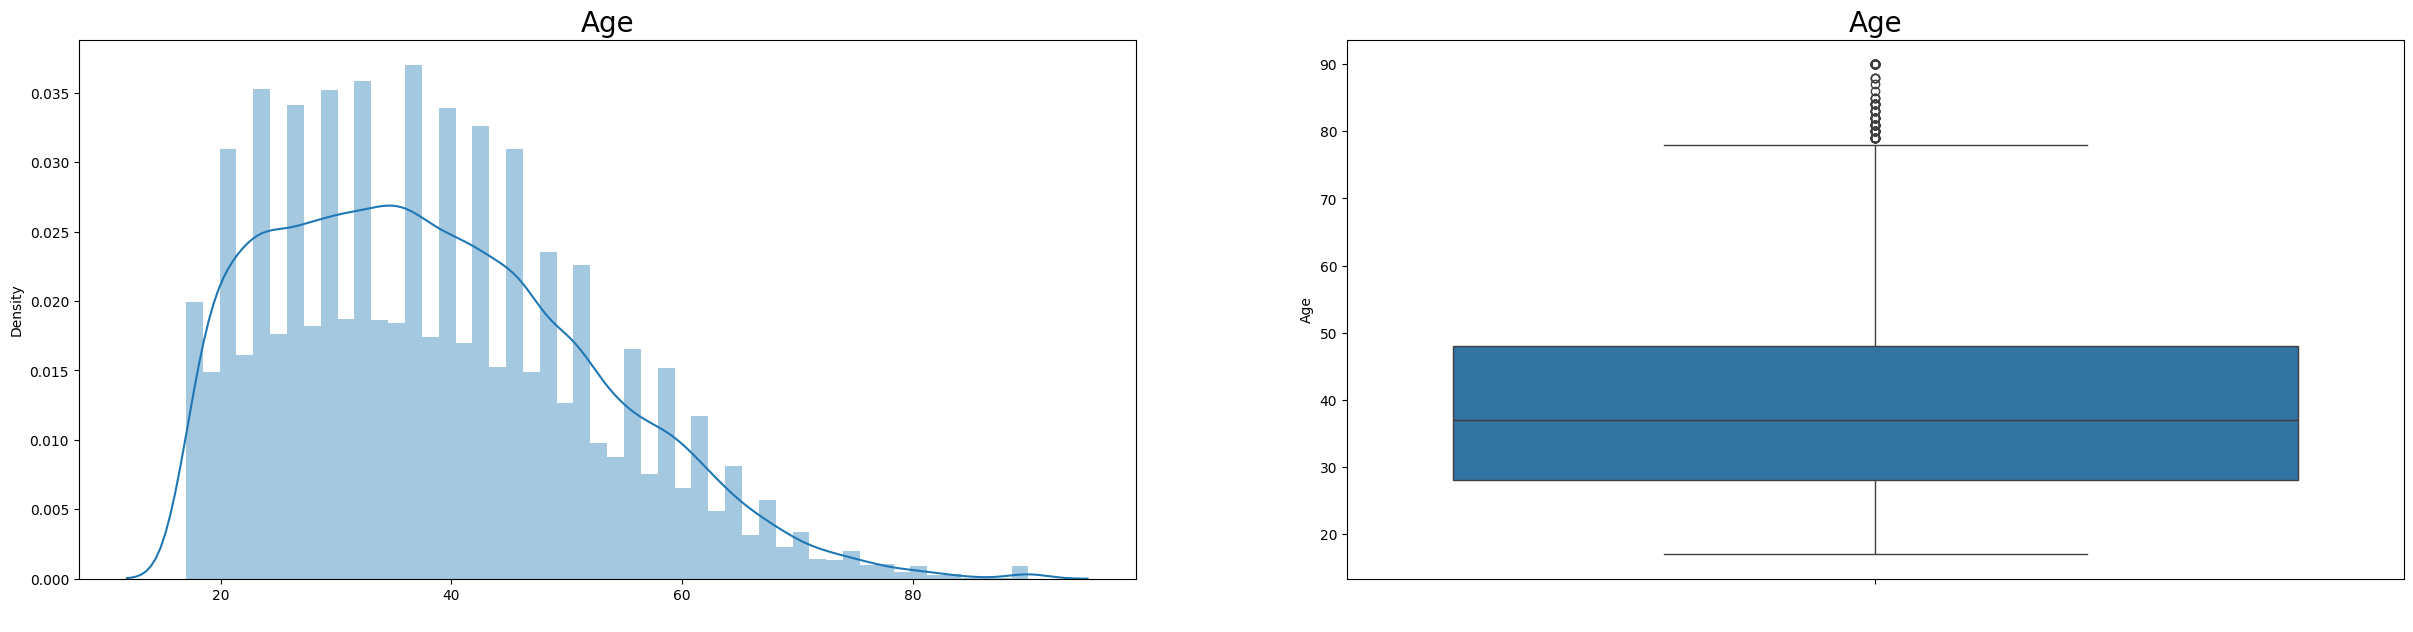

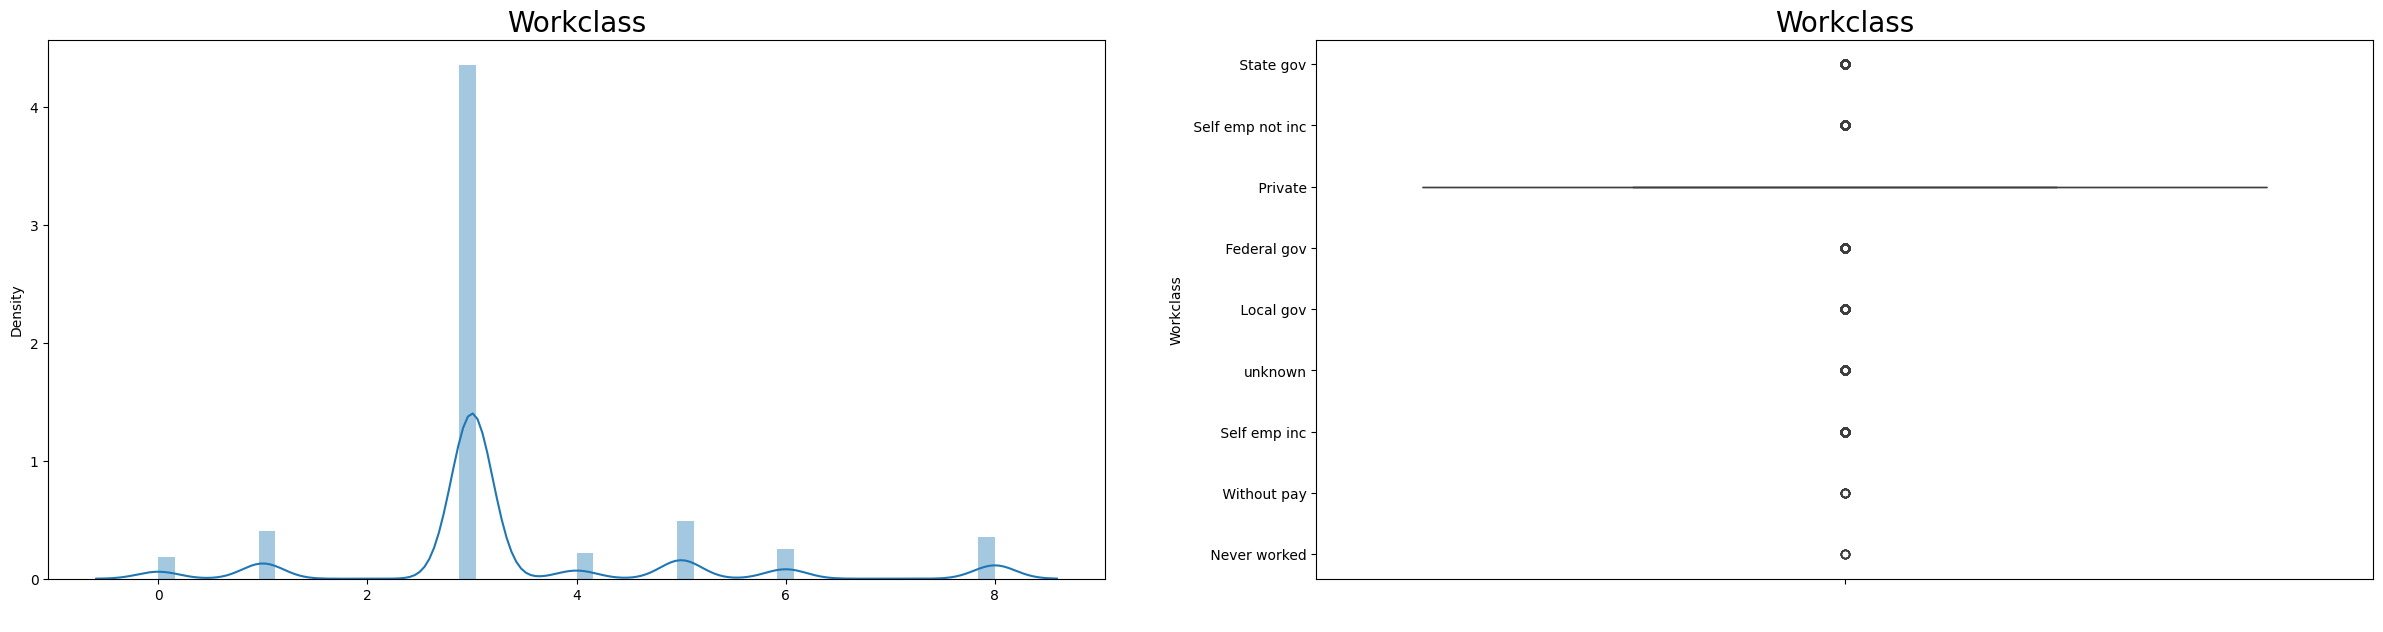

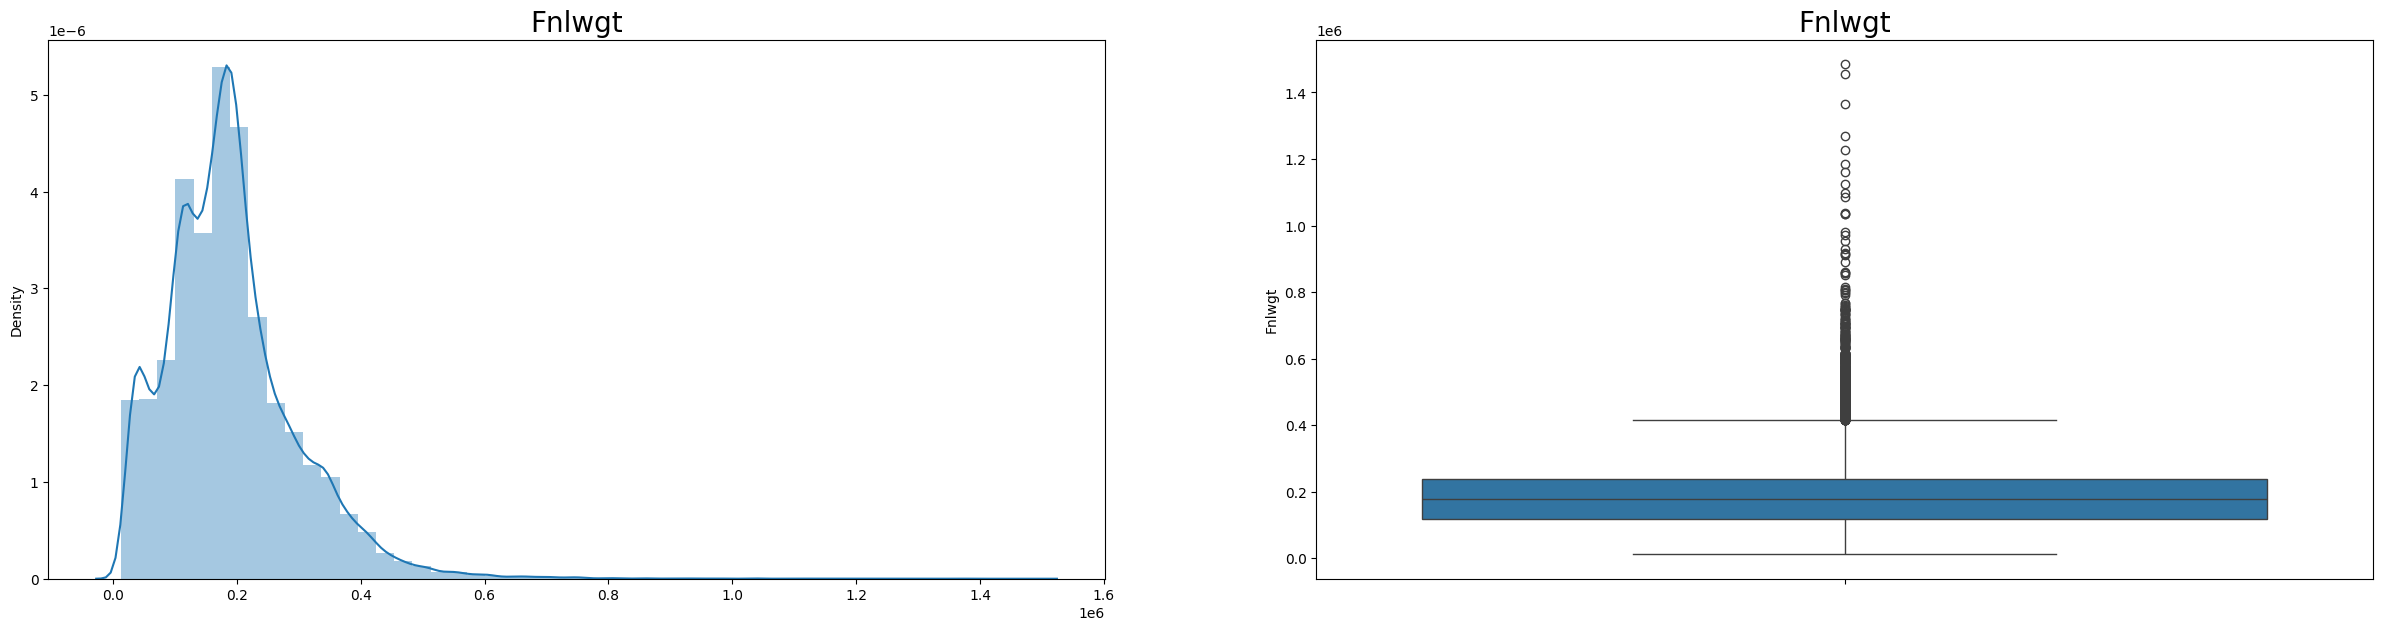

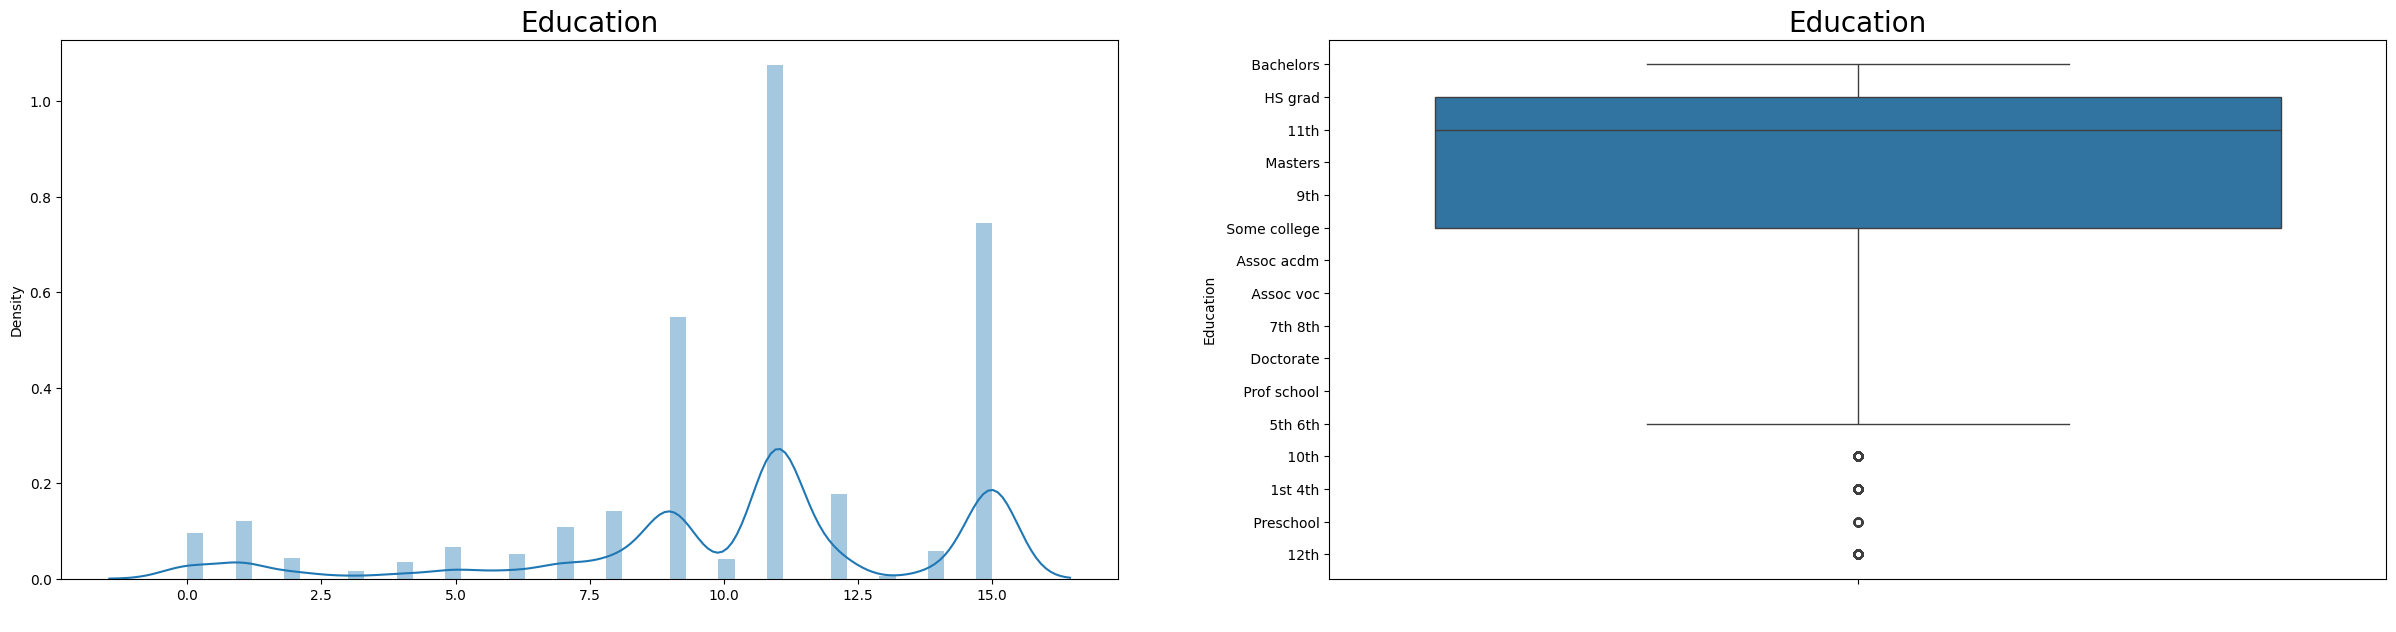

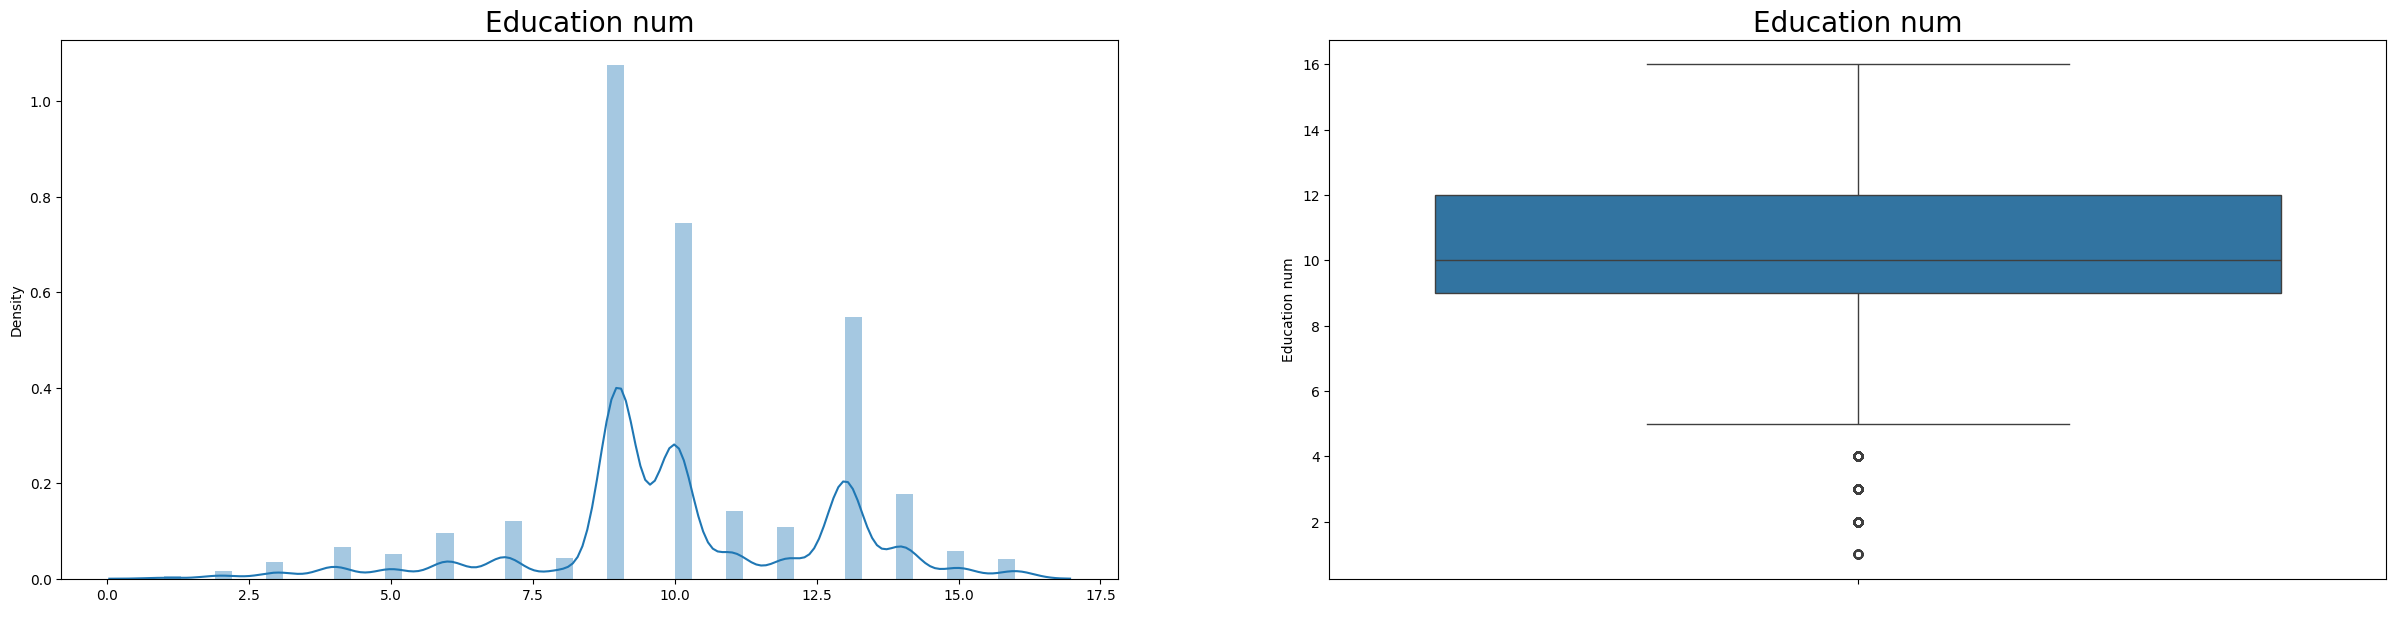

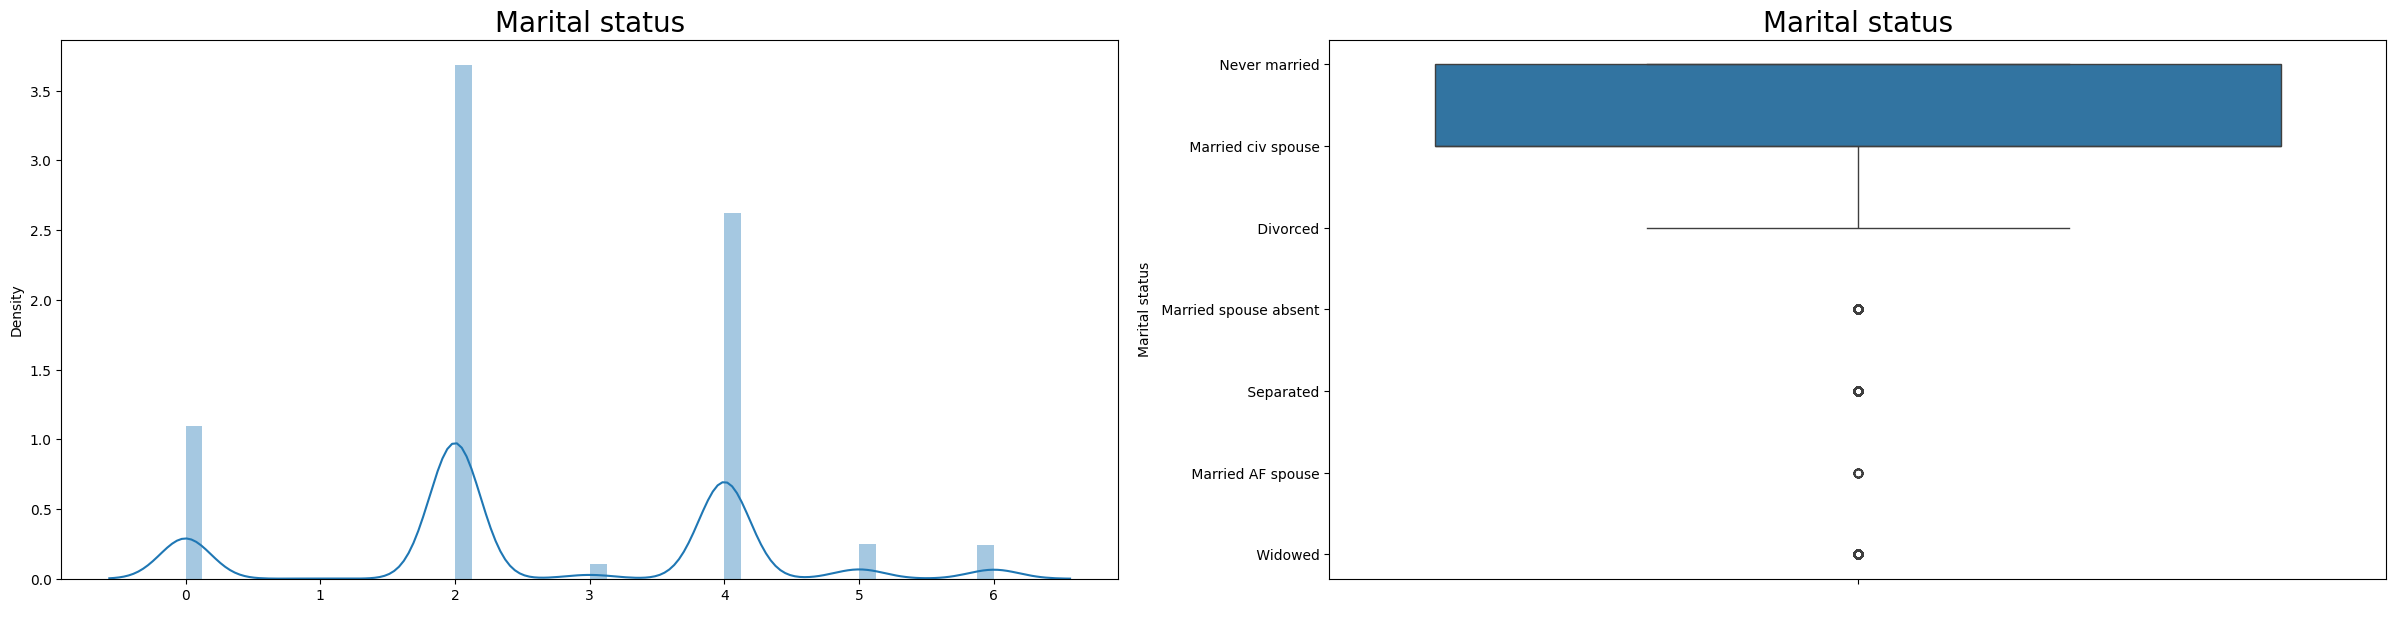

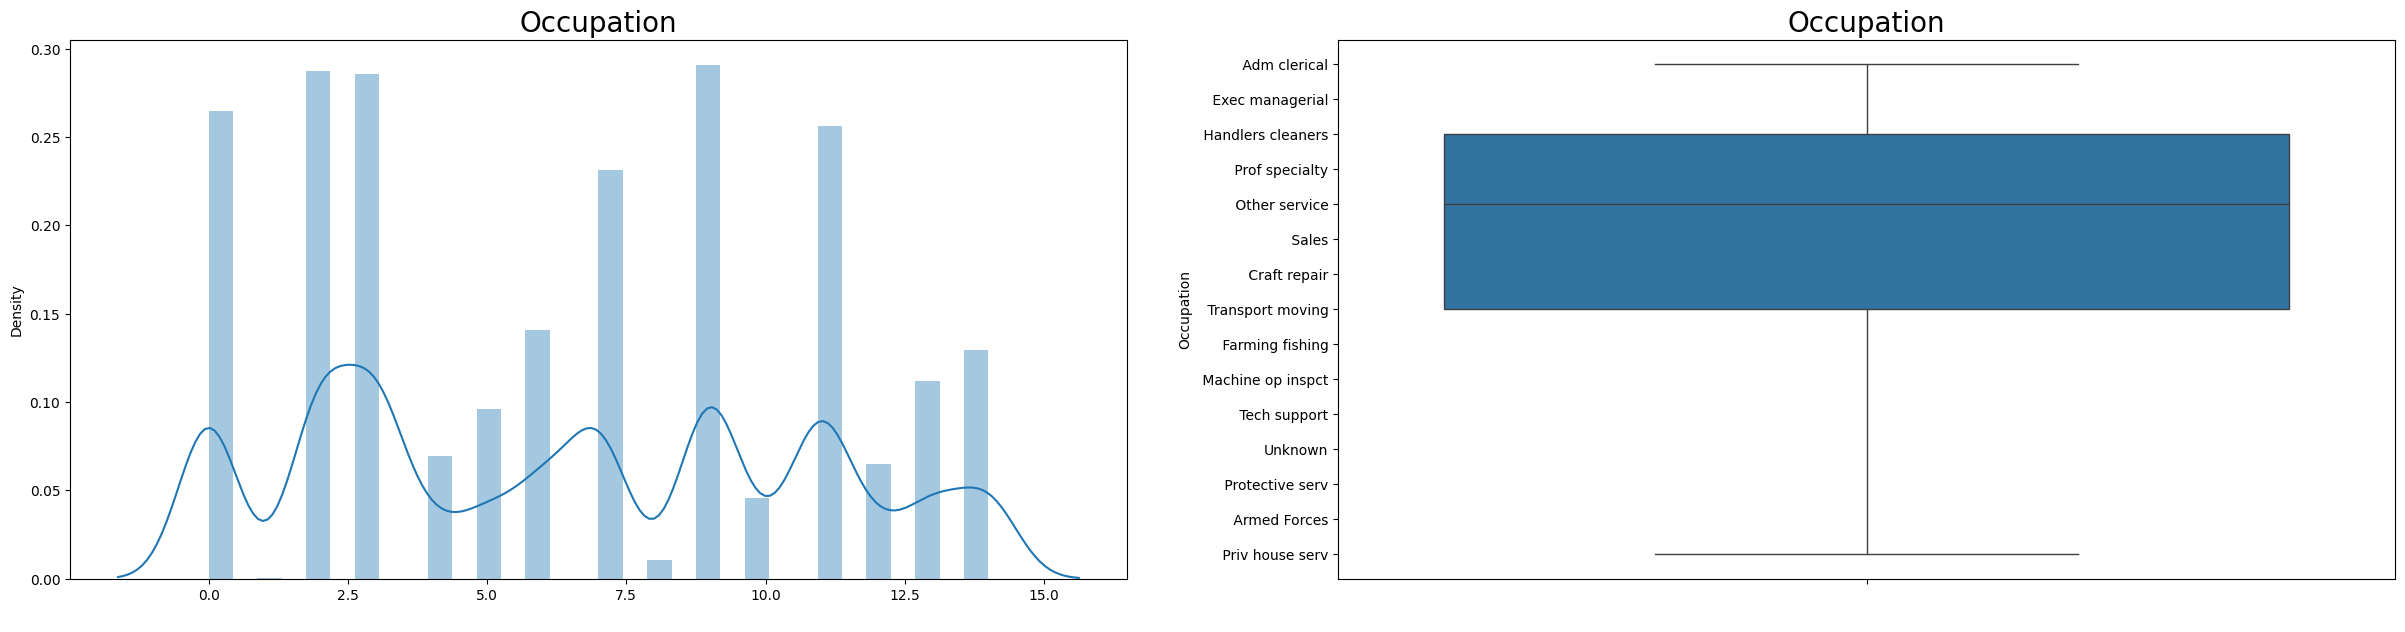

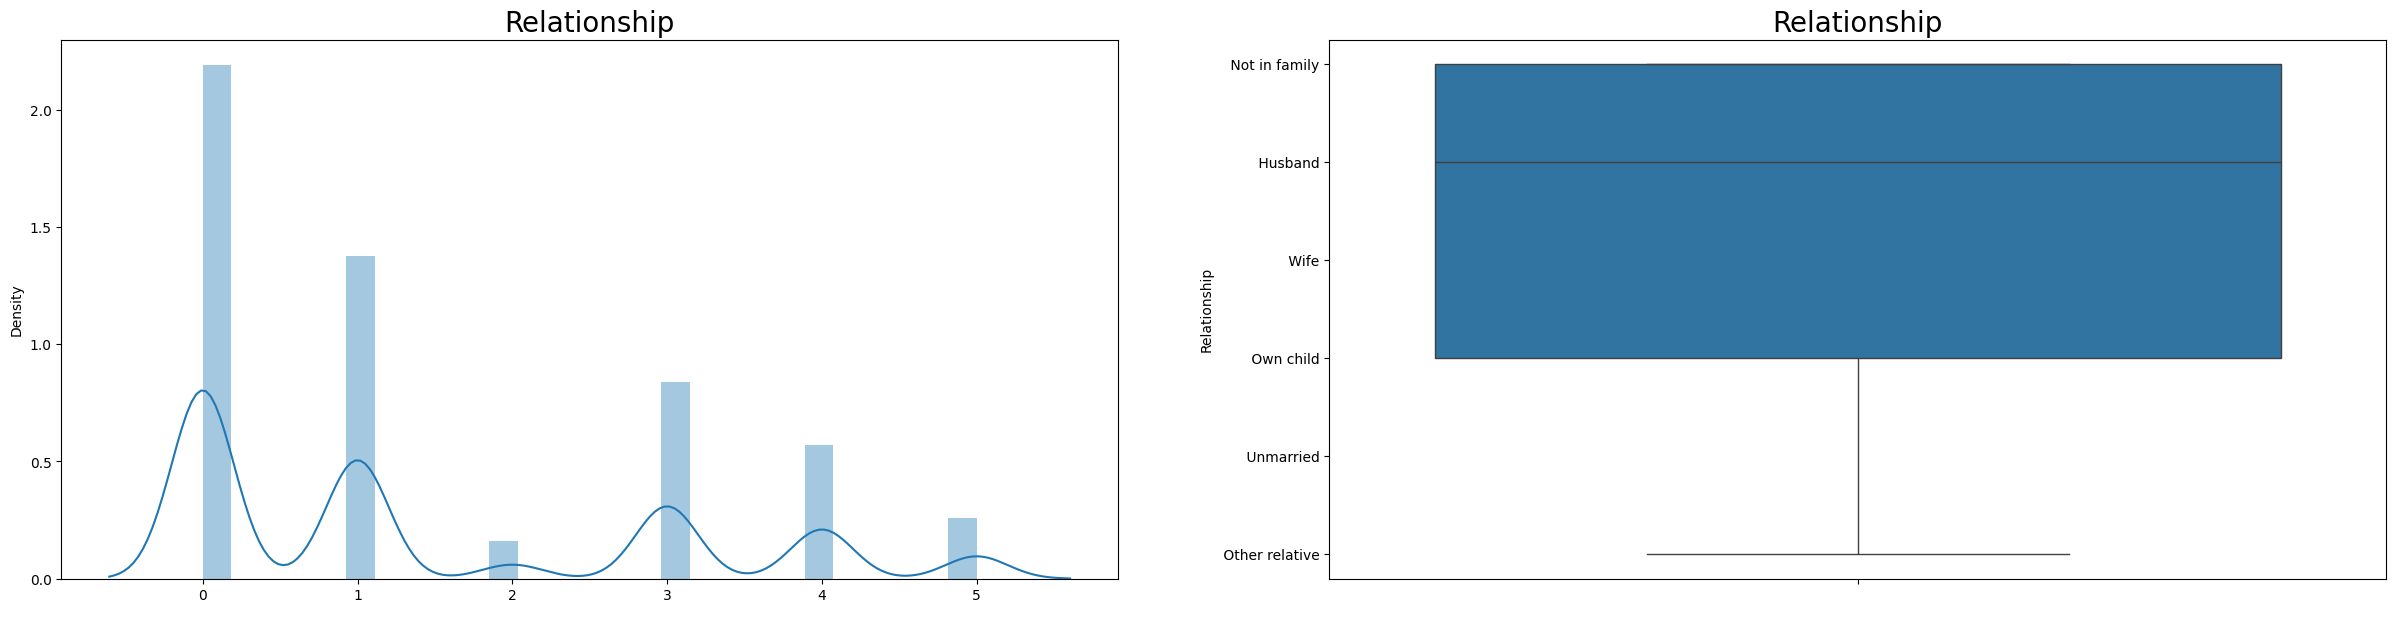

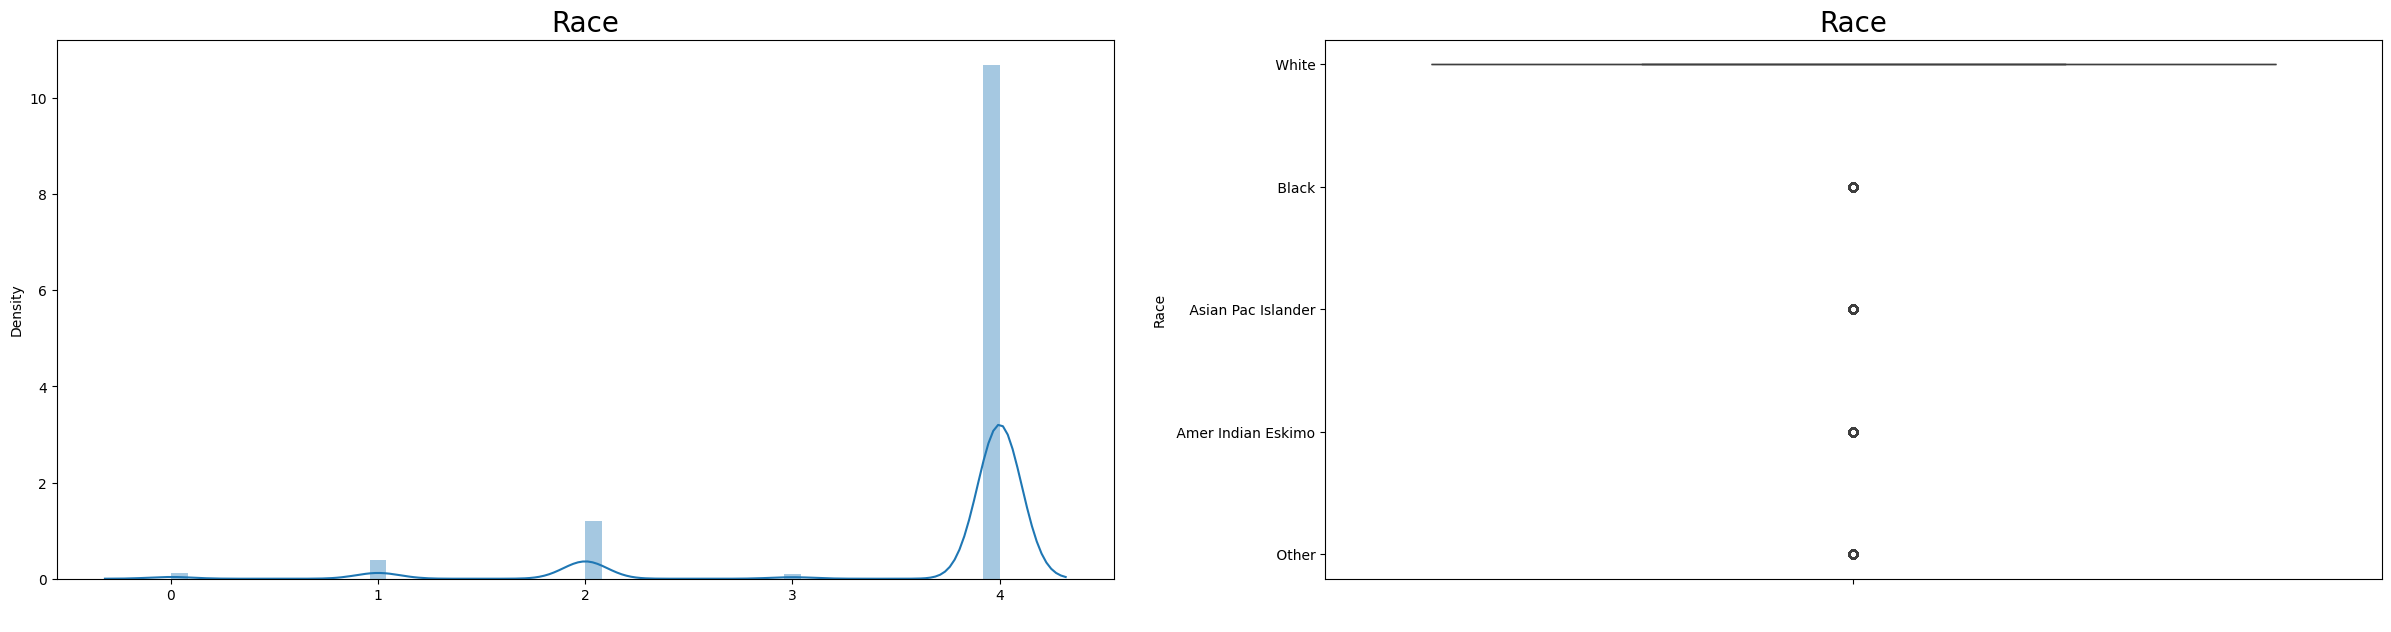

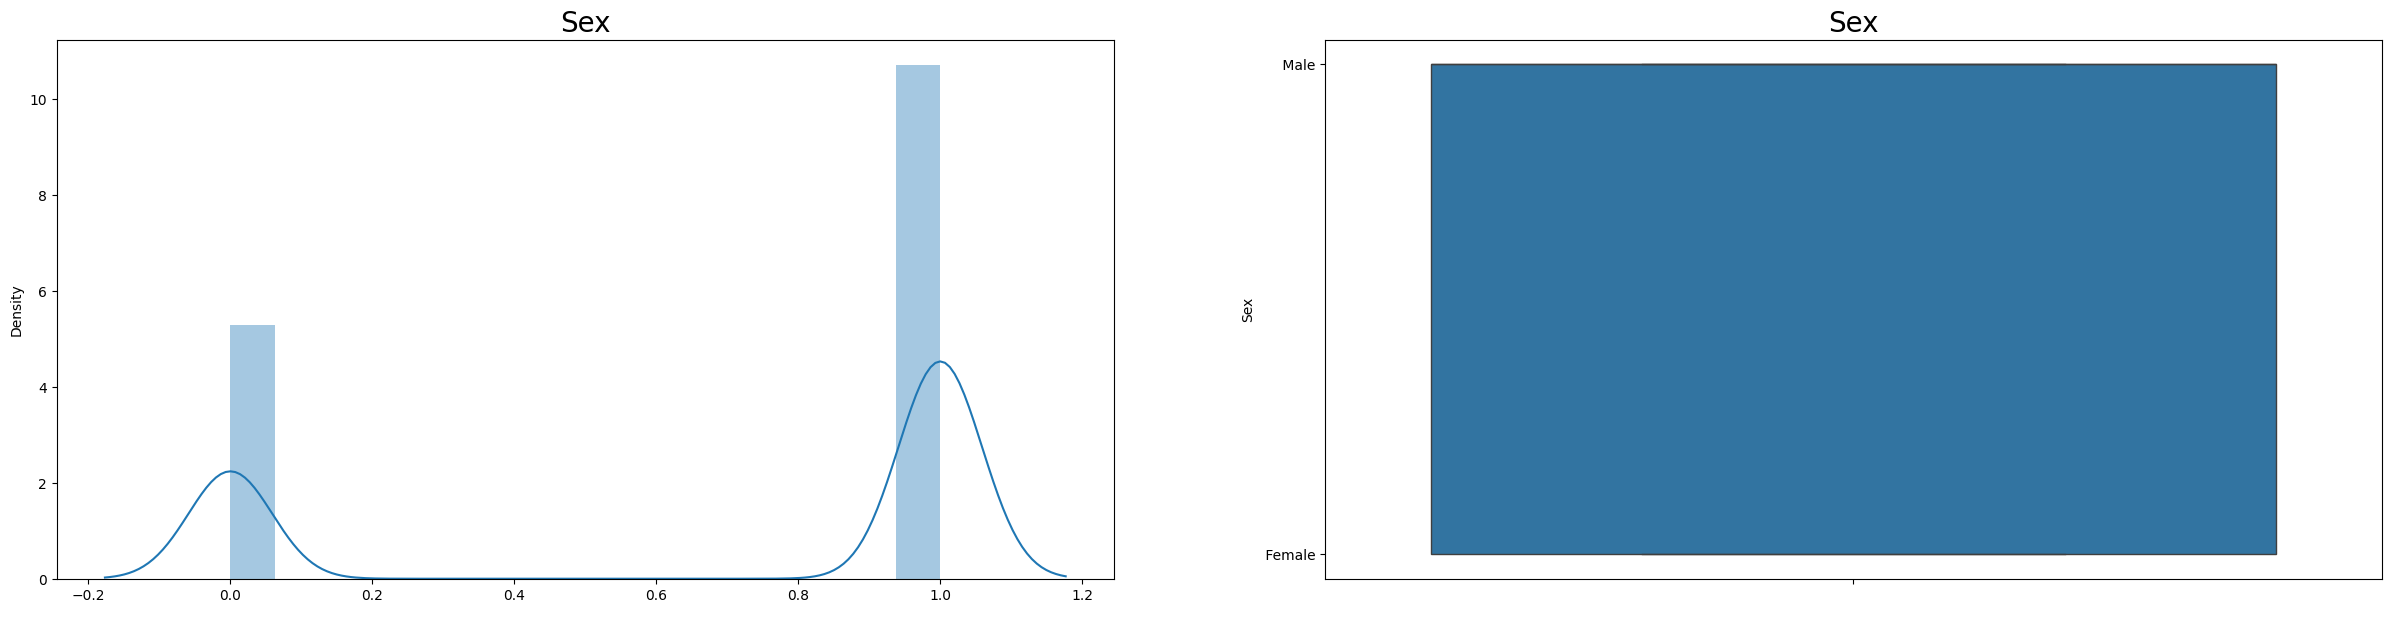

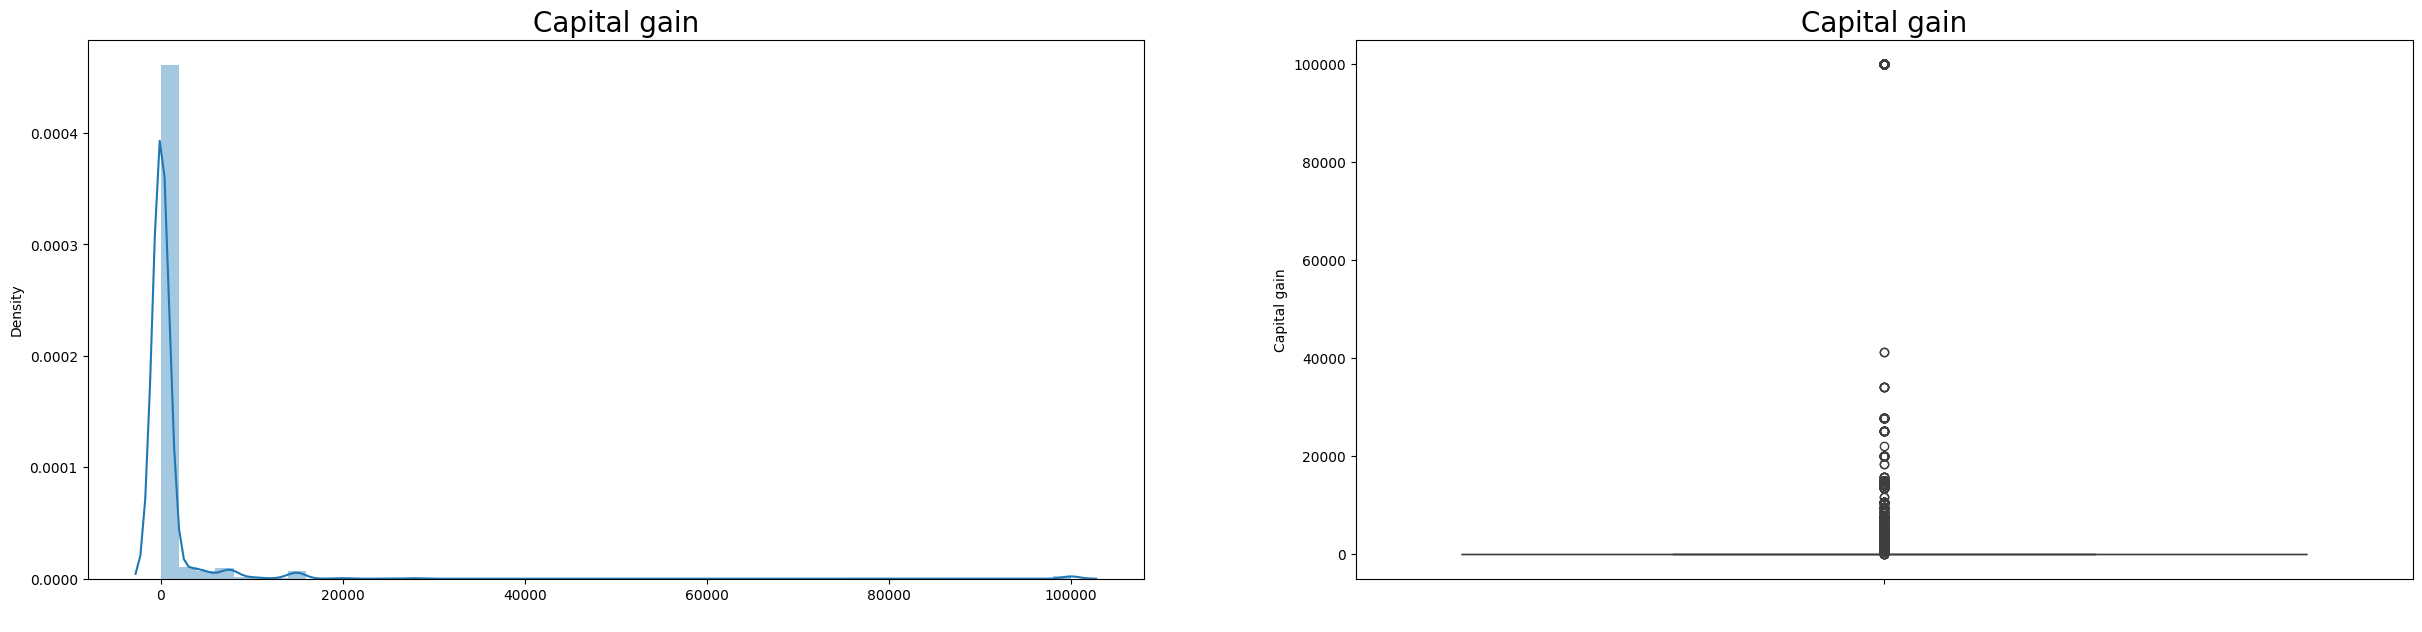

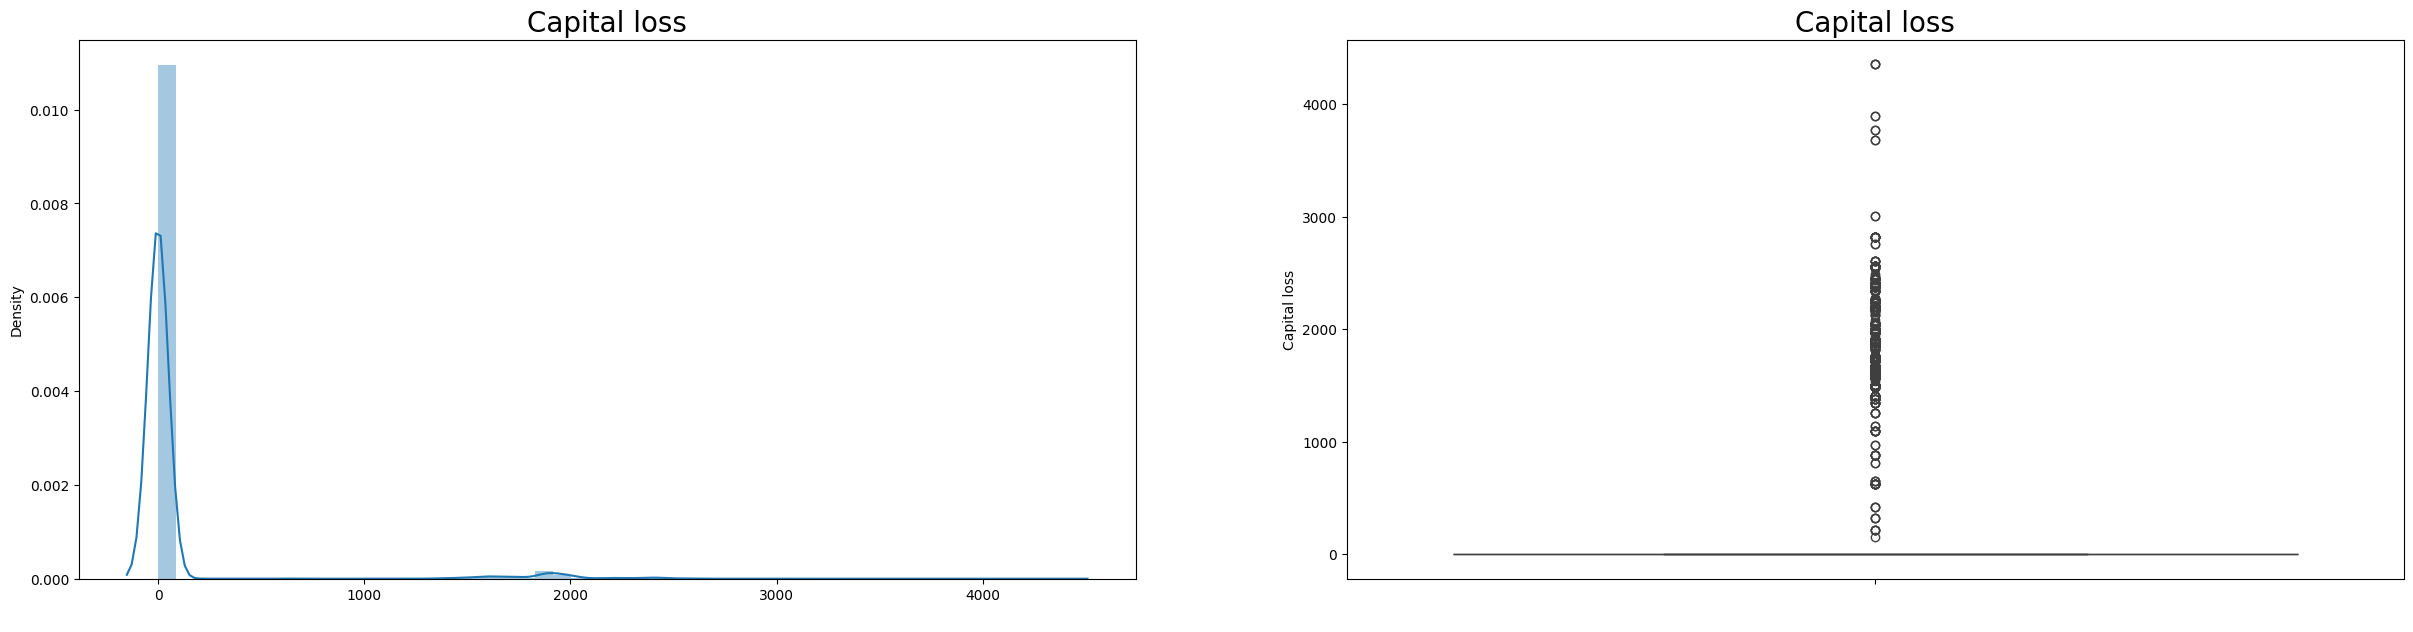

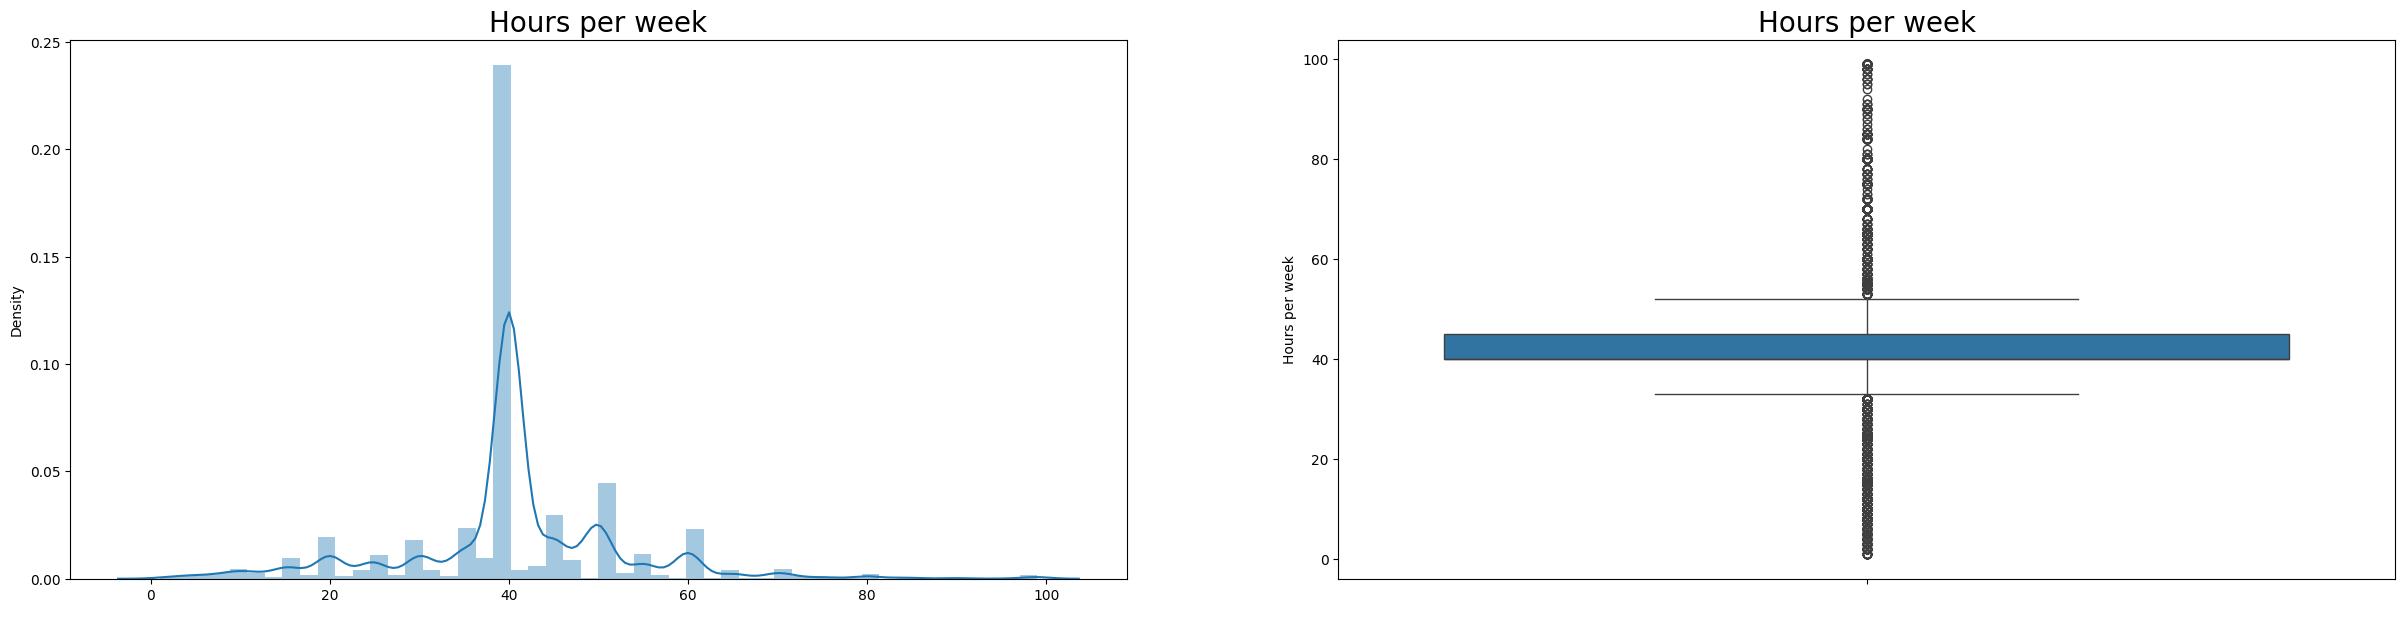

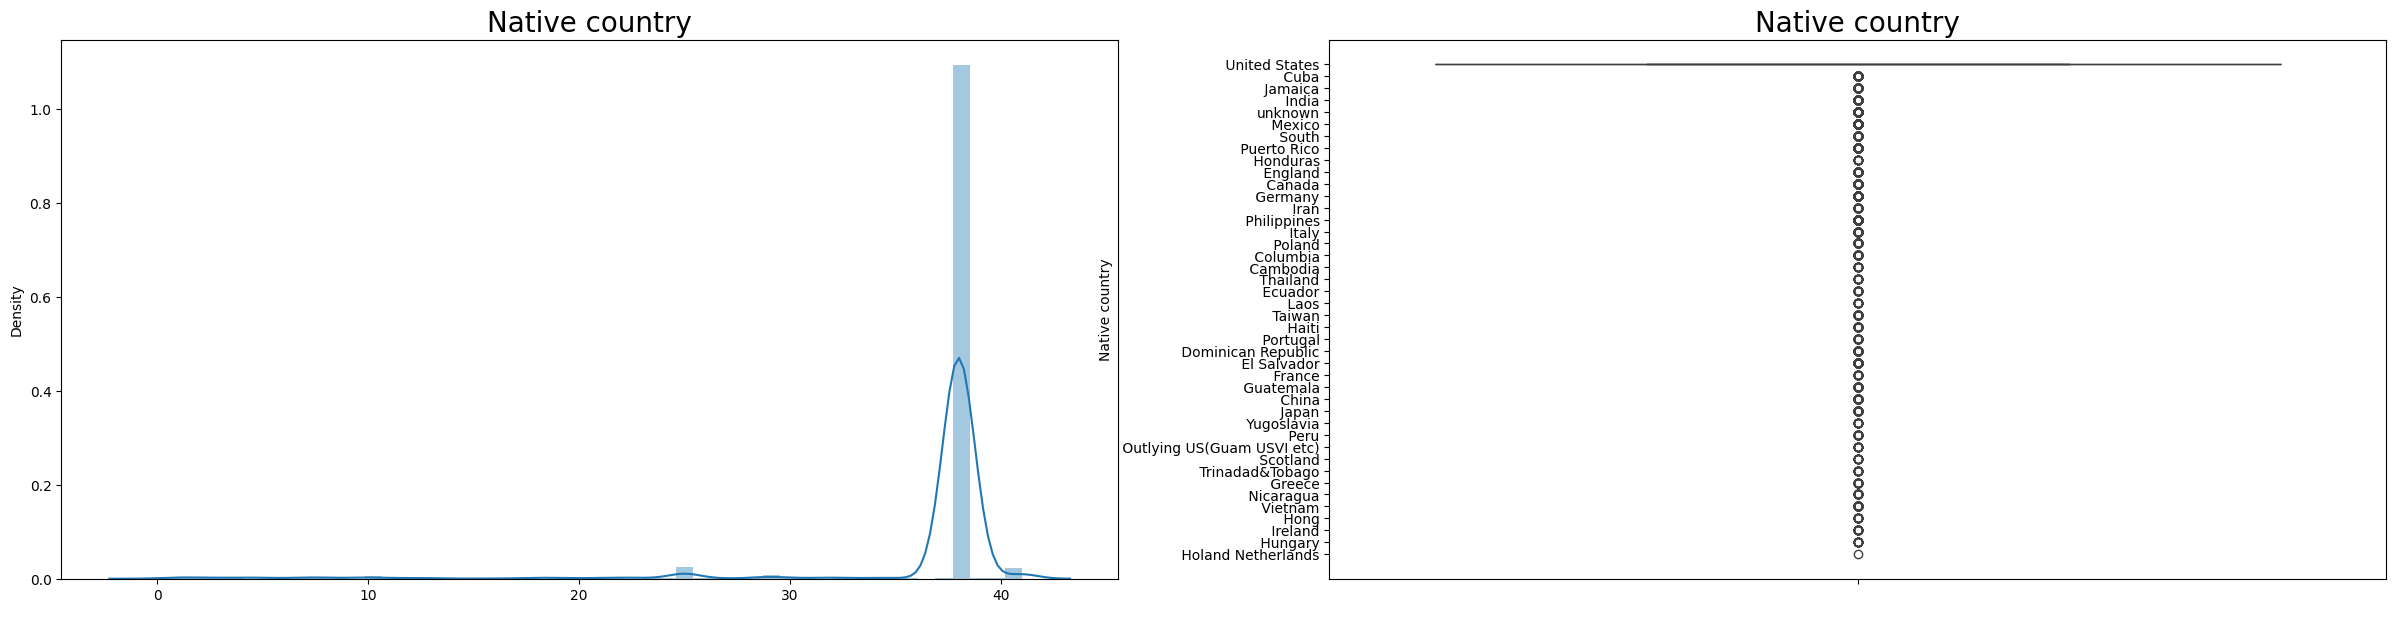

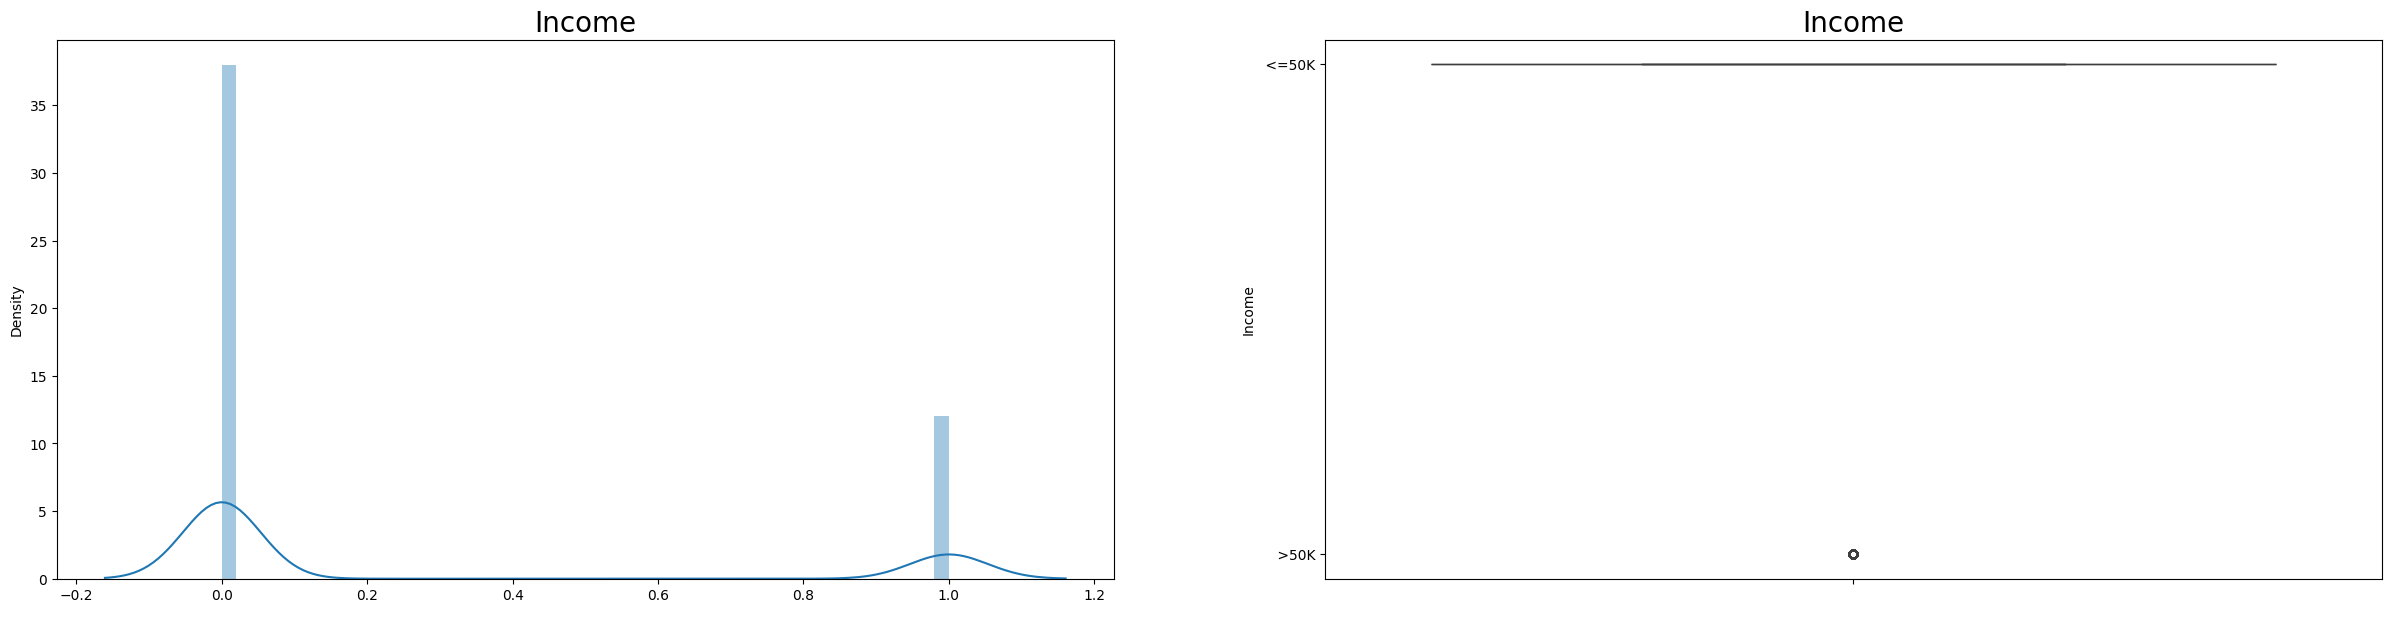

In [42]:
data1_columns = df2.columns
data1_columns
# Gives us the distribution and boxplot for all the columns.
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(df2[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)

    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(col, size = 20)
    plt.show()

# 	Checking the distributions/skewness in the variables

In [43]:
df2.skew()

,0
Age,0.56
Workclass,1.17
Fnlwgt,1.45
Education,-0.93
Education num,-0.31
Marital status,-0.01
Occupation,0.13
Relationship,0.79
Race,-2.44
Sex,-0.72


<Axes: >

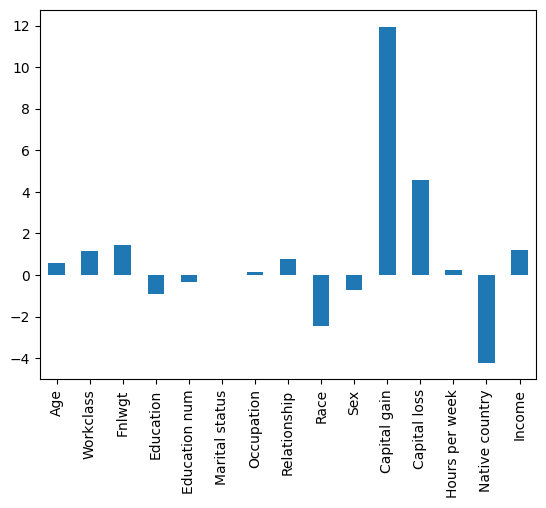

In [44]:
df2.skew().plot(kind='bar')

In [45]:
skewness = df2.skew()
skewness
def Level_of_skewness(s):
    if s > 1 or s < -1:
        return 'Highly Skewed'
    elif s > 0.5 or s<-0.5:
        return 'Moderately Skewed'
    else:
        return 'Lightly Skewed'

skewness_category = skewness.apply(Level_of_skewness)
print(skewness_category)

Age               Moderately Skewed
Workclass             Highly Skewed
Fnlwgt                Highly Skewed
Education         Moderately Skewed
Education num        Lightly Skewed
Marital status       Lightly Skewed
Occupation           Lightly Skewed
Relationship      Moderately Skewed
Race                  Highly Skewed
Sex               Moderately Skewed
Capital gain          Highly Skewed
Capital loss          Highly Skewed
Hours per week       Lightly Skewed
Native country        Highly Skewed
Income                Highly Skewed
dtype: object


**Observation:** The variables like 'Income','Workclass', 'Fnlwgt','Race','Capital loss', 'Capital gain','Native country' have highly skewed data

In [108]:
df2.shape


(32537, 14)

In [52]:
df3=df2.copy()#copy before removing skewness

In [53]:
#using transformation for removal of skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
exclude_column = 'Income'
transformed_columns = [col for col in df3.columns if col not in exclude_column]
df3[transformed_columns] = pt.fit_transform(df3[transformed_columns])
df3.head()

,Age,Workclass,Fnlwgt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
0,0.18,1.57,-1.18,-0.48,1.16,0.92,-1.72,0.13,0.41,0.70,3.32,-0.22,-0.04,0.21,0
1,0.89,1.05,-1.09,-0.48,1.16,-0.38,-0.70,-1.09,0.41,0.70,-0.30,-0.22,-2.22,0.21,0
2,0.10,-0.16,0.40,0.09,-0.46,-1.78,-0.20,0.13,0.41,0.70,-0.30,-0.22,-0.04,0.21,0
3,1.06,-0.16,0.56,-2.07,-1.20,-0.38,-0.20,-1.09,-2.43,0.70,-0.30,-0.22,-0.04,0.21,0
4,-0.73,-0.16,1.34,-0.48,1.16,-0.38,0.65,1.55,-2.43,-1.42,-0.30,-0.22,-0.04,-3.18,0


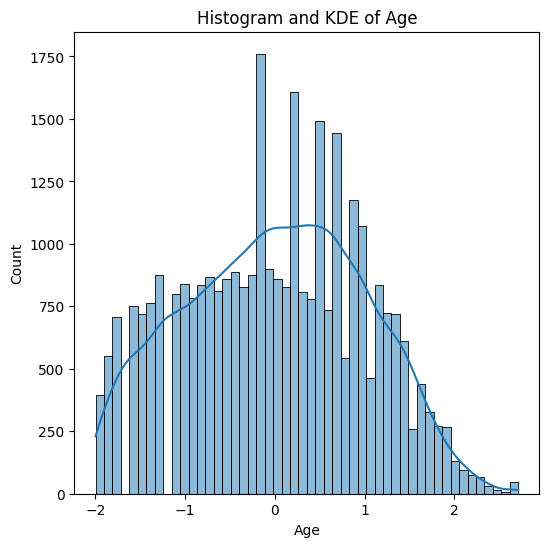

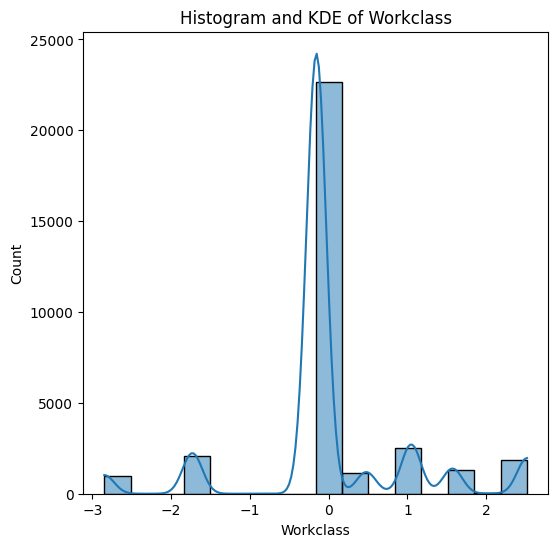

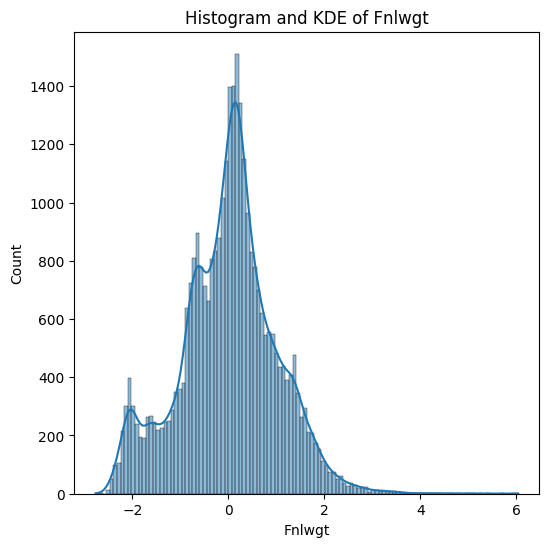

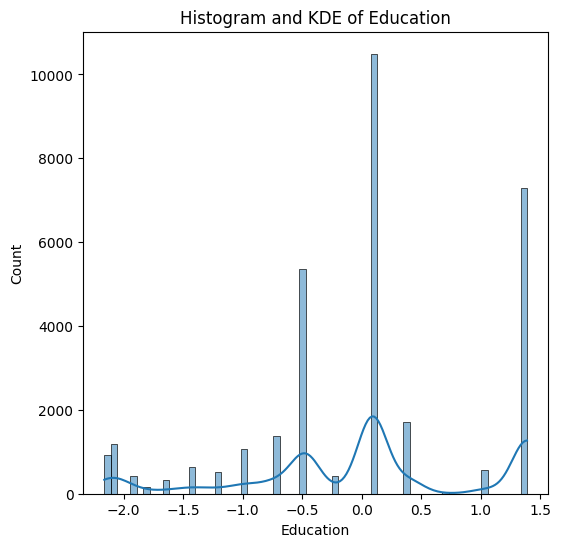

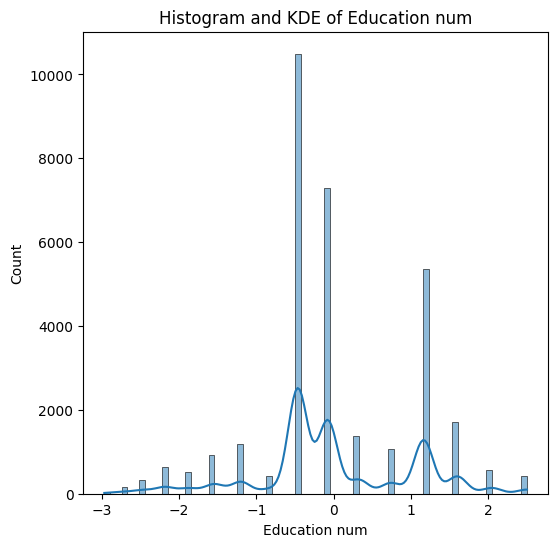

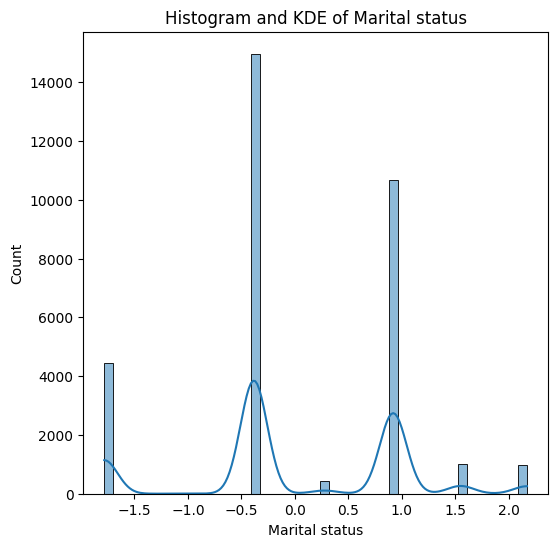

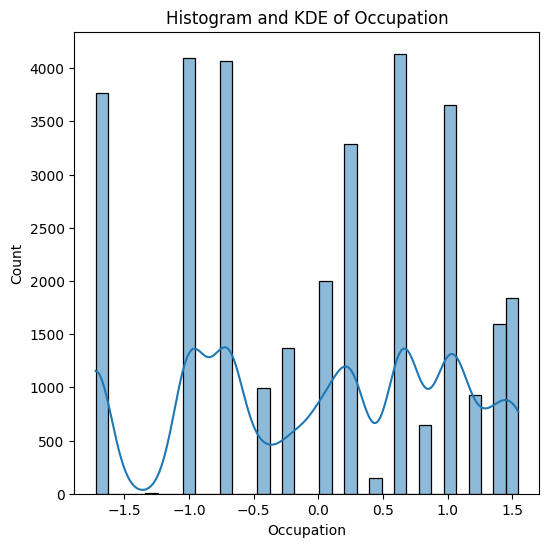

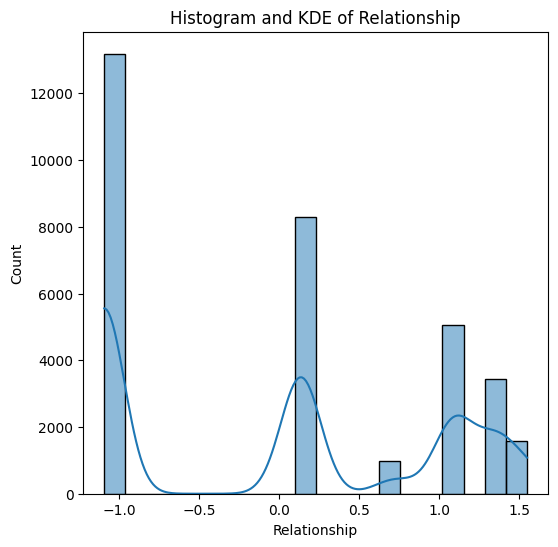

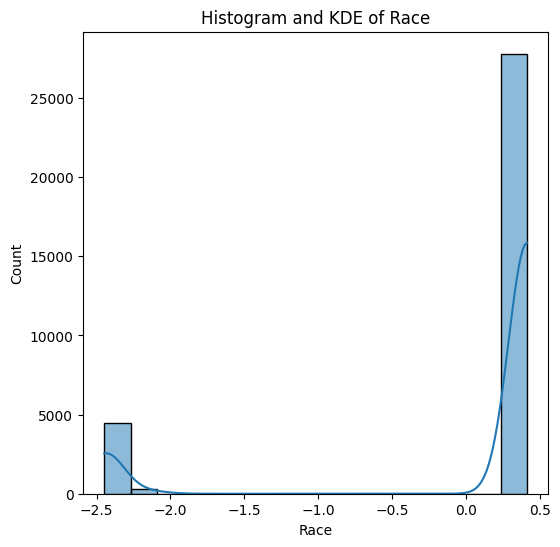

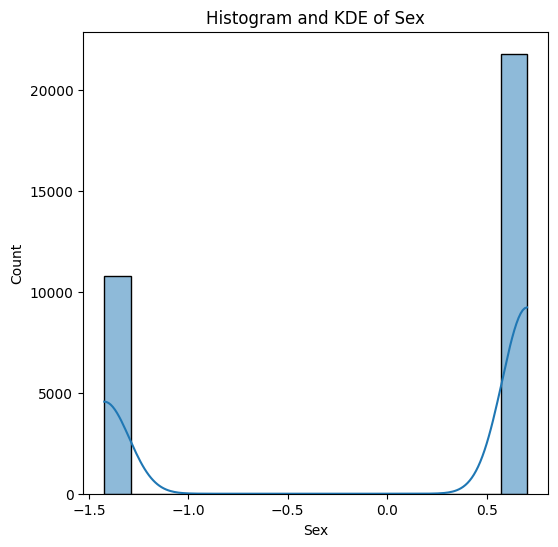

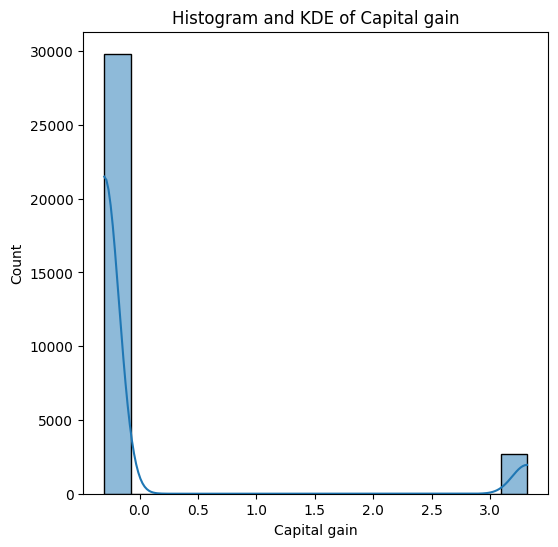

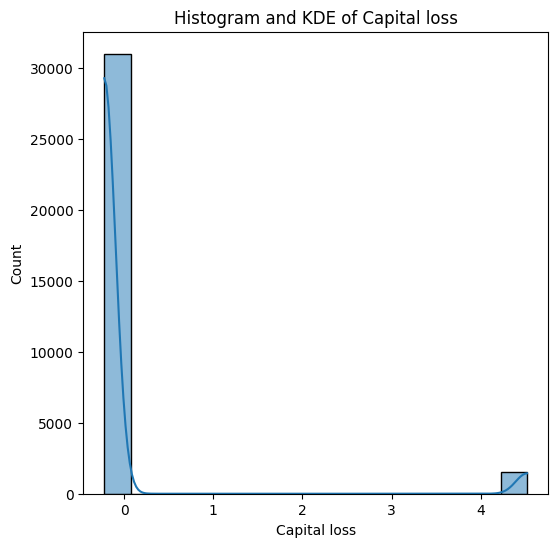

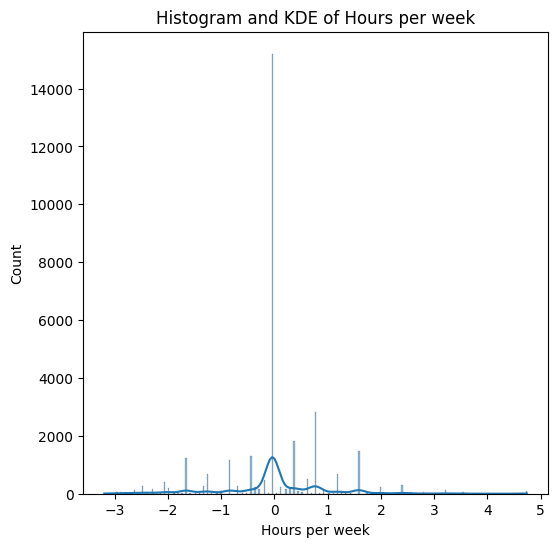

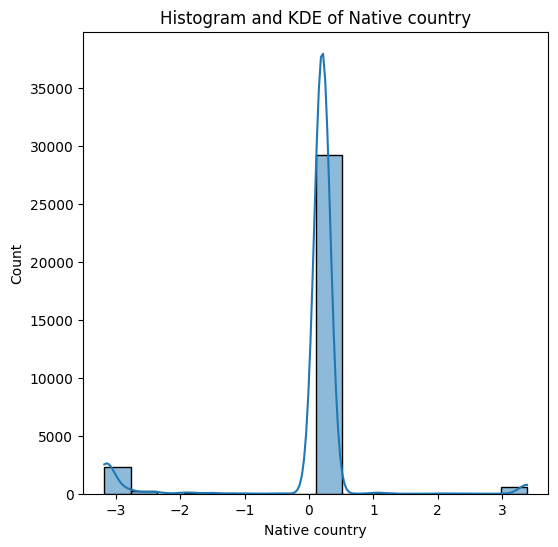

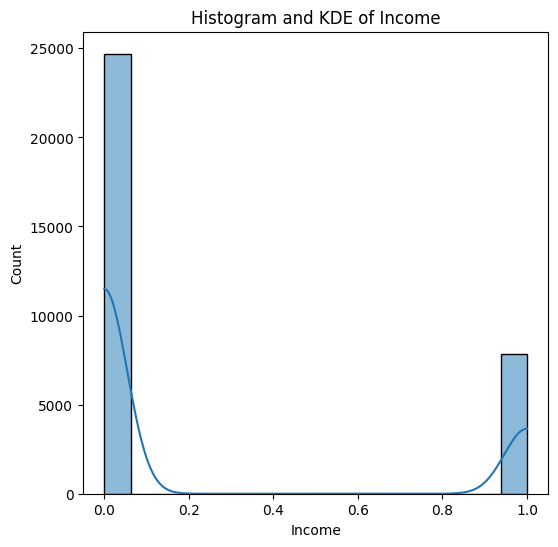

In [54]:
for col in df3.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(df3[col], kde=True)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

In [55]:
df3.skew()#after removing skewness

,0
Age,-0.01
Workclass,0.14
Fnlwgt,0.02
Education,-0.31
Education num,0.02
Marital status,-0.11
Occupation,-0.20
Relationship,0.12
Race,-2.01
Sex,-0.72


# 	Checking/Treating the outliers


In [59]:

def check_outliers(df2):
    outliers = {}
    for column in df2.select_dtypes(include=['number']).columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
        #data['Column'] = np.where(data['column'] < lower_bound, lower_bound, data['column'])


        #index=df[column][(df[column]>upper_bound)|(df[column]<lower_bound)].index
        #df.drop(index,inplace=True)

    return outliers
outliers = check_outliers(df2)
outliers

{'Age':        Age  Workclass  Fnlwgt  Education  Education num  Marital status  \
 74      79          3  124744         15             10               2   
 222     90          3   51744         11              9               4   
 430     80          8  107762         11              9               6   
 918     81          5  136063         11              9               2   
 1040    90          3  137018         11              9               4   
 ...    ...        ...     ...        ...            ...             ...   
 32277   90          3  313749         11              9               6   
 32367   90          1  214594          5              4               2   
 32459   85          3   98611          9             13               2   
 32494   82          8  403910         11              9               4   
 32525   81          8  120478          8             11               0   
 
        Occupation  Relationship  Race  Sex  Capital gain  Capital loss  \
 74 

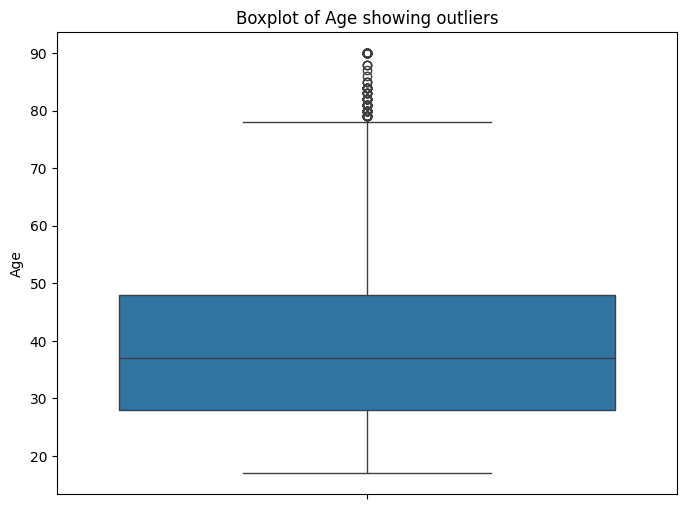

Outliers in Age:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
74      79          3  124744             10               2           9   
222     90          3   51744              9               4           7   
430     80          8  107762              9               6          14   
918     81          5  136063              9               2           3   
1040    90          3  137018              9               4           7   
...    ...        ...     ...            ...             ...         ...   
32277   90          3  313749              9               6           0   
32367   90          1  214594              4               2          10   
32459   85          3   98611             13               2           3   
32494   82          8  403910              9               4          14   
32525   81          8  120478             11               0          14   

       Relationship  Race  Sex  Capital gain  Capital loss  Hours per 

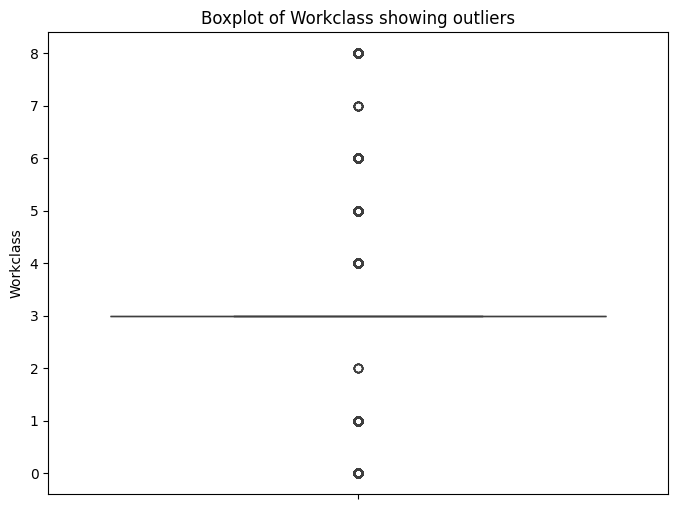

Outliers in Workclass:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
0       39          6   77516             13               4           0   
1       50          5   83311             13               2           3   
7       52          5  209642              9               2           3   
11      30          6  141297             13               2           9   
16      25          5  176756              9               4           4   
...    ...        ...     ...            ...             ...         ...   
32545   39          1  111499             12               2           0   
32548   65          5   99359             15               4           9   
32549   43          6  255835             10               0           0   
32550   43          5   27242             10               2           2   
32560   52          4  287927              9               2           3   

       Relationship  Race  Sex  Capital gain  Capital loss  Hour

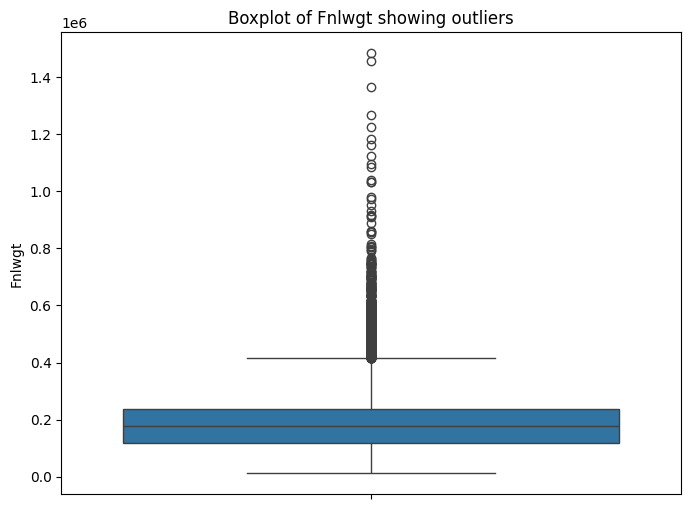

Outliers in Fnlwgt:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
37      19          3  544091              9               1           0   
40      31          3  507875              5               2           6   
80      18          3  446839              9               4          11   
110     24          3  432376             13               4          11   
157     71          5  494223             10               5          11   
...    ...        ...     ...            ...             ...         ...   
32306   24          3  427686              2               2           5   
32329   28          3  435842             13               2           3   
32470   50          3  485710             16               0           9   
32496   18          3  436163              7               4           9   
32511   25          1  514716             13               4           0   

       Relationship  Race  Sex  Capital gain  Capital loss  Hours p

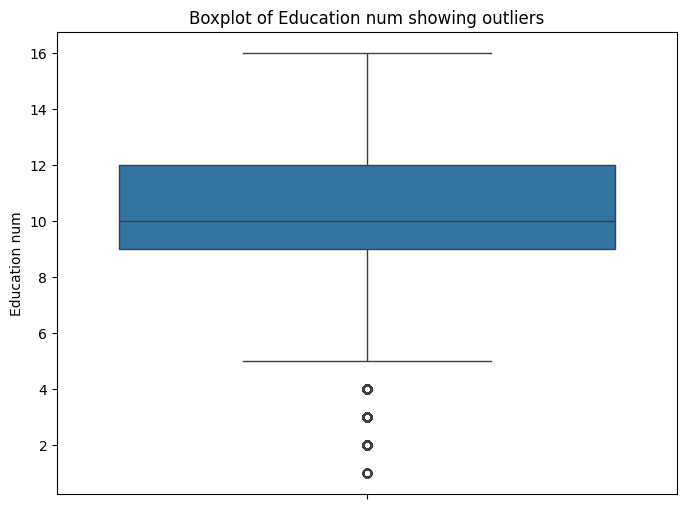

Outliers in Education num:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
15      34          3  245487              4               2          13   
56      46          3  216666              3               2           6   
61      32          8  293936              4               3          14   
79      31          1  125927              4               2           4   
160     68          8   38317              2               0          14   
...    ...        ...     ...            ...             ...         ...   
32431   51          3  274502              4               0           6   
32432   36          3  208068              1               0           7   
32448   61          3  137554              4               2           2   
32479   64          6  222966              4               2           7   
32517   36          3  131459              4               2           2   

       Relationship  Race  Sex  Capital gain  Capital loss  

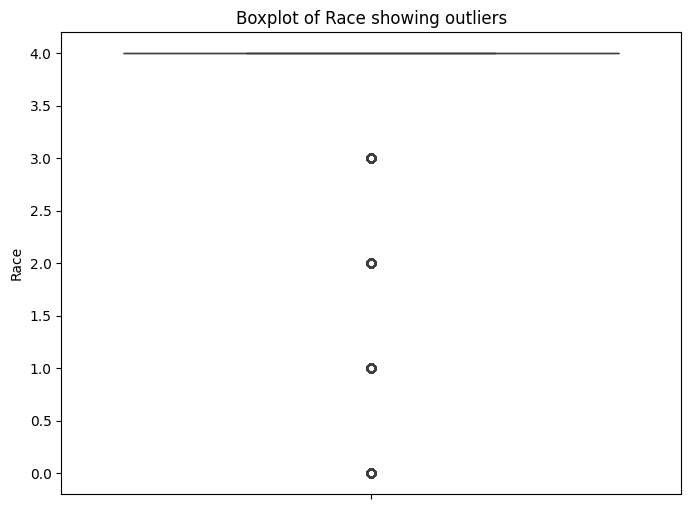

Outliers in Race:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
3       53          3  234721              7               2           5   
4       28          3  338409             13               2           9   
6       49          3  160187              5               3           7   
10      37          3  280464             10               2           3   
11      30          6  141297             13               2           9   
...    ...        ...     ...            ...             ...         ...   
32538   38          3  139180             13               0           9   
32541   41          8  202822              9               5          14   
32544   31          3  199655             14               0           7   
32551   32          3   34066              6               2           5   
32553   32          3  116138             14               4          12   

       Relationship  Race  Sex  Capital gain  Capital loss  Hours per

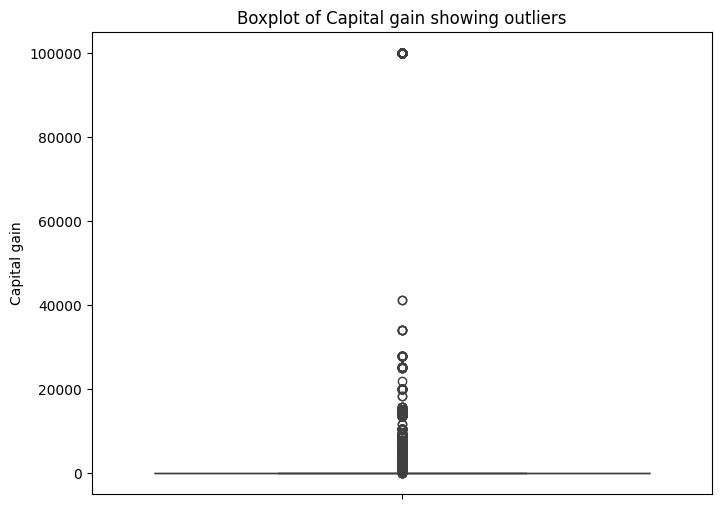

Outliers in Capital gain:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
0       39          6   77516             13               4           0   
8       31          3   45781             14               4           9   
9       42          3  159449             13               2           3   
59      30          3  188146              9               2           6   
60      30          3   59496             13               2          11   
...    ...        ...     ...            ...             ...         ...   
32515   66          0   47358              6               2           2   
32518   57          1  110417              9               2           2   
32538   38          3  139180             13               0           9   
32548   65          5   99359             15               4           9   
32560   52          4  287927              9               2           3   

       Relationship  Race  Sex  Capital gain  Capital loss  H

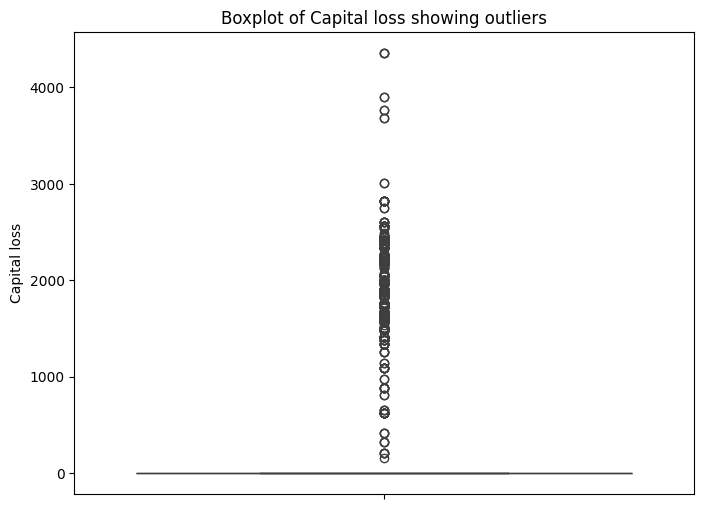

Outliers in Capital loss:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
23      43          3  117037              7               2          13   
32      45          3  386940             13               0           3   
52      47          3   51835             15               2           9   
93      30          3  117747              9               2          11   
96      48          5  191277             16               2           9   
...    ...        ...     ...            ...             ...         ...   
32441   53          3  304504             10               2          13   
32443   18          3   41381              9               4          11   
32445   61          3  190682              9               6           2   
32458   36          3  237943             13               2           9   
32500   34          3   60567              7               0          13   

       Relationship  Race  Sex  Capital gain  Capital loss  H

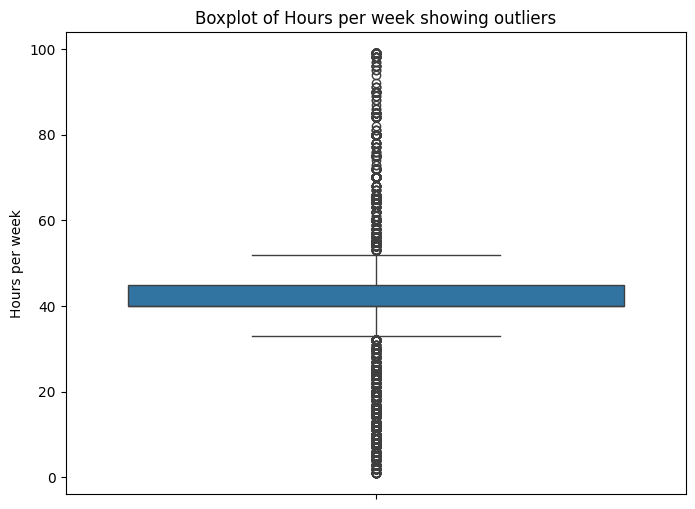

Outliers in Hours per week:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
1       50          5   83311             13               2           3   
6       49          3  160187              5               3           7   
10      37          3  280464             10               2           3   
12      23          3  122272             13               4           0   
20      40          3  193524             16               2           9   
...    ...        ...     ...            ...             ...         ...   
32544   31          3  199655             14               0           7   
32545   39          1  111499             12               2           0   
32548   65          5   99359             15               4           9   
32553   32          3  116138             14               4          12   
32559   22          3  201490              9               4           0   

       Relationship  Race  Sex  Capital gain  Capital loss 

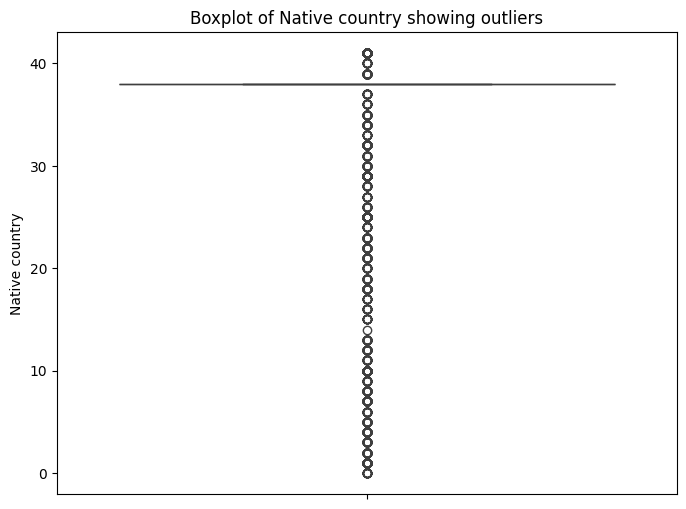

Outliers in Native country:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
4       28          3  338409             13               2           9   
6       49          3  160187              5               3           7   
11      30          6  141297             13               2           9   
14      40          3  121772             11               2           2   
15      34          3  245487              4               2          13   
...    ...        ...     ...            ...             ...         ...   
32510   39          3  107302              9               2           9   
32525   81          8  120478             11               0          14   
32533   54          3  337992             13               2           3   
32547   43          3  260761              9               2           6   
32553   32          3  116138             14               4          12   

       Relationship  Race  Sex  Capital gain  Capital loss 

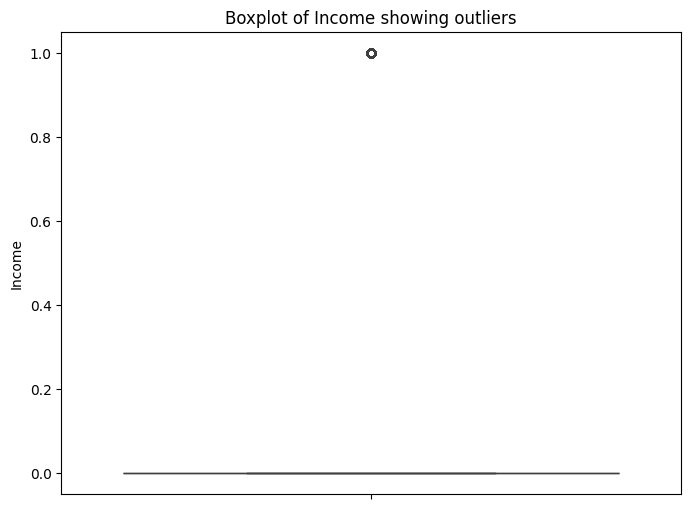

Outliers in Income:
       Age  Workclass  Fnlwgt  Education num  Marital status  Occupation  \
7       52          5  209642              9               2           3   
8       31          3   45781             14               4           9   
9       42          3  159449             13               2           3   
10      37          3  280464             10               2           3   
11      30          6  141297             13               2           9   
...    ...        ...     ...            ...             ...         ...   
32539   71          8  287372             16               2          14   
32545   39          1  111499             12               2           0   
32554   53          3  321865             14               2           3   
32557   40          3  154374              9               2           6   
32560   52          4  287927              9               2           3   

       Relationship  Race  Sex  Capital gain  Capital loss  Hours p

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is already defined as in your provided code

def check_outliers(df2):
    outliers = {}
    for column in df2.select_dtypes(include=['number']).columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    return outliers

outliers = check_outliers(df2)

# Now visualize the outliers for each numerical column
for col, outlier_df in outliers.items():
  if not outlier_df.empty:  # Check if there are any outliers for this column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col} showing outliers')
    plt.show()
    print(f"Number of outliers in {col}: {len(outlier_df)}")
    print(outlier_df) # print the outlier data points
  else:
    print(f"No outliers found in column: {col}")


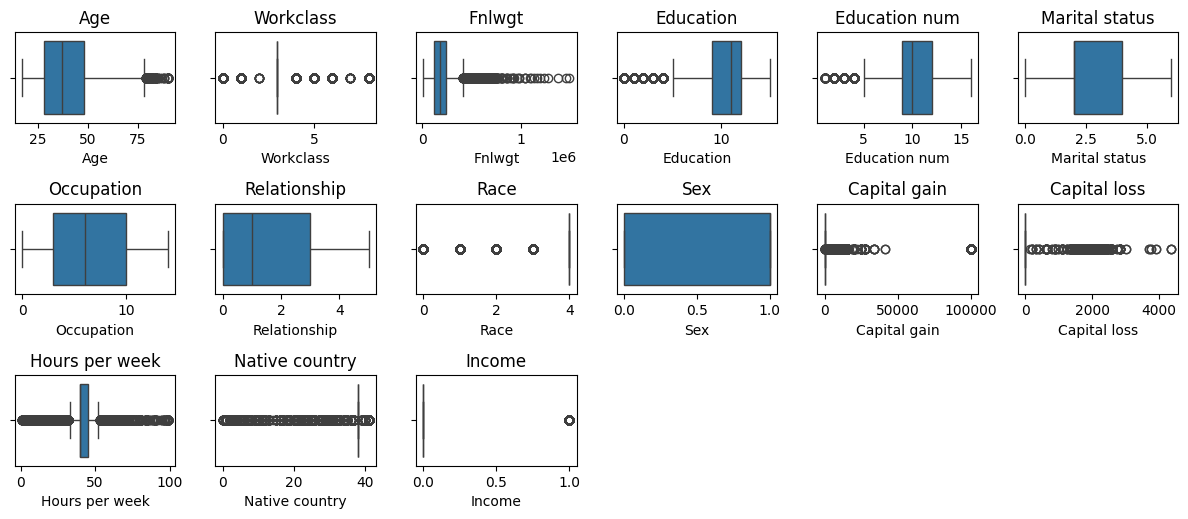

In [60]:
plt.figure(figsize=(12, 10))

for col in df3.columns:
    plt.subplot(6, 6, df3.columns.get_loc(col) + 1)
    sns.boxplot(x=df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Observation:** The variables like Capital gain, Capital loss, Native Country, Fnlwgt, Hours per week, Race and Workclass have a lot of outliers as the data is also skewed in these variables.

In [61]:
#Copying data before removing outliers
df4=df3.copy()

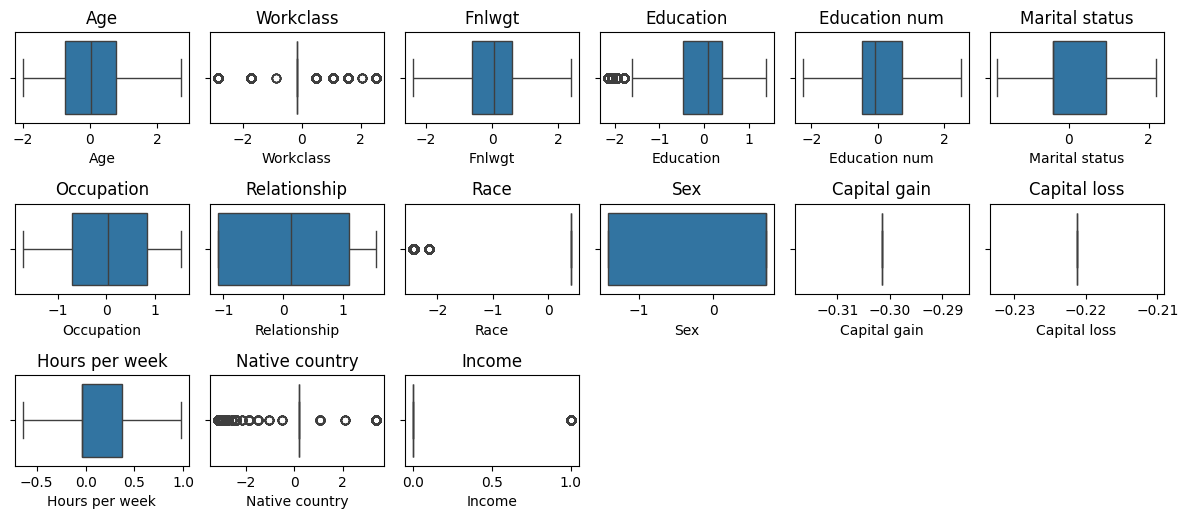

In [62]:
def cap_outliers(df4, column):
    Q1 = df4[column].quantile(0.25)
    Q3 = df4[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df4[column] = np.clip(df4[column], lower_bound, upper_bound)
    return df4

for col in ['Fnlwgt', 'Capital gain', 'Capital loss','Hours per week', 'Age', 'Education num']:
    df4 = cap_outliers(df4, col)

#Now you can visualize the boxplot of df2 to see if outliers have been capped
plt.figure(figsize=(12, 10))

for col in df4.columns:
    plt.subplot(6, 6, df4.columns.get_loc(col) + 1)
    sns.boxplot(x=df4[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# 	Creating a ML model to predict the Income based on the specifications given


A.Creating model without EDA(without removing skewness)

In [46]:
df2.head()

,Age,Workclass,Fnlwgt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [47]:
#Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

dfs = pd.DataFrame(scaler_standard.fit_transform(df2), columns=df2.columns)#standard_scaled
minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df2), columns=df2.columns)#minmax_scaled
dfs.head()
minmax_scaled.head()


,Age,Workclass,Fnlwgt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
0,0.30,0.75,0.04,0.60,0.80,0.67,0.00,0.20,1.00,1.00,0.02,0.00,0.40,0.93,0.00
1,0.45,0.62,0.05,0.60,0.80,0.33,0.21,0.00,1.00,1.00,0.00,0.00,0.12,0.93,0.00
2,0.29,0.38,0.14,0.73,0.53,0.00,0.36,0.20,1.00,1.00,0.00,0.00,0.40,0.93,0.00
3,0.49,0.38,0.15,0.07,0.40,0.33,0.36,0.00,0.50,1.00,0.00,0.00,0.40,0.93,0.00
4,0.15,0.38,0.22,0.60,0.80,0.33,0.64,1.00,0.50,0.00,0.00,0.00,0.40,0.10,0.00


#Firstly lets check which dataset will give better result by using few algorithims

df2- data without EDA(without removing skewness)

df3- data with skewness removed

df4 - data with both skewness and outliers removed

In [48]:

from sklearn.preprocessing import StandardScaler


X = df2.drop('Income', axis=1)
y = df2['Income']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26029, 13), (6508, 13), (26029,), (6508,))

In [49]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_predictions))


# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_predictions))

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_predictions))


# XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

Decision Tree Accuracy: 0.8102335586969883
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4905
           1       0.61      0.64      0.63      1603

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.75      6508
weighted avg       0.81      0.81      0.81      6508

Random Forest Accuracy: 0.8612476951444377
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4905
           1       0.76      0.64      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.82      0.79      0.80      6508
weighted avg       0.86      0.86      0.86      6508

SVM Accuracy: 0.8501843884449908
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4905
           1       0.77      0.56      0.65      1603

    accuracy                           0.85      6508
   macro 

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")



# Bagging Classifier (using Decision Tree as base estimator)
bagging_clf = BaggingClassifier(estimator=None, n_estimators=10,  max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

Decision Tree Accuracy: 0.8102
Random Forest Accuracy: 0.8612
XGBoost Accuracy: 0.8702
SVM Accuracy: 0.8502
Logistic Regression Accuracy: 0.8251
Bagging Classifier Accuracy: 0.8427


B.Creating Model after removing skewness


In [56]:
X = df3.drop('Income', axis=1)
y = df3['Income']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X = df3.drop('Income', axis=1)
y = df3['Income']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26029, 13), (6508, 13), (26029,), (6508,))

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_predictions))


# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_predictions))

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_predictions))


# XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

Decision Tree Accuracy: 0.8034726490473264
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4905
           1       0.60      0.63      0.61      1603

    accuracy                           0.80      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.80      0.81      6508

Random Forest Accuracy: 0.8555623847572219
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4905
           1       0.74      0.63      0.68      1603

    accuracy                           0.86      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.86      0.85      6508

SVM Accuracy: 0.8371235402581438
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4905
           1       0.72      0.55      0.62      1603

    accuracy                           0.84      6508
   macro 

C. Creating model After removing outliers

In [63]:
X = df4.drop('Income', axis=1)
y = df4['Income']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_predictions))


# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_predictions))

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_predictions))


# XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

Decision Tree Accuracy: 0.7685925015365703
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4905
           1       0.53      0.56      0.54      1603

    accuracy                           0.77      6508
   macro avg       0.69      0.70      0.69      6508
weighted avg       0.77      0.77      0.77      6508

Random Forest Accuracy: 0.8295943454210203
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4905
           1       0.68      0.58      0.63      1603

    accuracy                           0.83      6508
   macro avg       0.77      0.75      0.76      6508
weighted avg       0.82      0.83      0.82      6508

SVM Accuracy: 0.8236017209588199
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4905
           1       0.73      0.45      0.56      1603

    accuracy                           0.82      6508
   macro 

After removing outliers the accuracy is reduced so we will consider the data after removing skewness only, i.e., df3


In [65]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")



# Bagging Classifier (using Decision Tree as base estimator)
bagging_clf = BaggingClassifier(estimator=None, n_estimators=10,  max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

Decision Tree Accuracy: 0.7686
Random Forest Accuracy: 0.8296
XGBoost Accuracy: 0.8362
SVM Accuracy: 0.8236
Logistic Regression Accuracy: 0.8171
Bagging Classifier Accuracy: 0.8153


In [69]:
# In order to deal with class imbalance issue we use SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Print the class distribution
print('Original dataset shape %s' % Counter(y_train))



# Print the class distribution after applying SMOTE
print('Resampled dataset shape %s' % Counter(y_train_resampled))

Original dataset shape Counter({0: 19793, 1: 6236})
Resampled dataset shape Counter({0: 19793, 1: 19793})


*Observation:* Clearly their  is class imbalance  issue which is impacting the accuracy of model lets fix this

In [75]:
# In order to deal with class imbalance issue we use SMOTE
from imblearn.over_sampling import SMOTE



# Observation Clearly their  is class imbalance  issue which is impacting the accuracy of model lets fix this
from collections import Counter
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Print the class distribution
print('Original dataset shape %s' % Counter(y_train))



# Print the class distribution after applying SMOTE
print('Resampled dataset shape %s' % Counter(y_train_resampled))

# Now train your models using the resampled data
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy (after SMOTE): {dt_accuracy}")
print(classification_report(y_test, dt_predictions))

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy (after SMOTE): {rf_accuracy}")
print(classification_report(y_test, rf_predictions))

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy (after SMOTE): {svm_accuracy}")
print(classification_report(y_test, svm_predictions))

# XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy (after SMOTE): {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

Original dataset shape Counter({0: 19793, 1: 6236})
Resampled dataset shape Counter({0: 19793, 1: 19793})
Decision Tree Accuracy (after SMOTE): 0.7977873386601106
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4905
           1       0.58      0.66      0.62      1603

    accuracy                           0.80      6508
   macro avg       0.73      0.75      0.74      6508
weighted avg       0.81      0.80      0.80      6508

Random Forest Accuracy (after SMOTE): 0.8454210202827289
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4905
           1       0.68      0.71      0.69      1603

    accuracy                           0.85      6508
   macro avg       0.79      0.80      0.80      6508
weighted avg       0.85      0.85      0.85      6508

SVM Accuracy (after SMOTE): 0.7758143822987092
              precision    recall  f1-score   support

           0       0.94 

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example using RandomForestClassifier and RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)
print("Test set accuracy: {:.2f}".format(test_accuracy))


# using GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)
print("Test set accuracy: {:.2f}".format(test_accuracy))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation score: 0.89
Test set accuracy: 0.84
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.90
Test set accuracy: 0.84


# 	Use all the Supervised ML algorithms (DT, RF, SVM, XGBoost etc.) and compare the performances to get the best model.

In [78]:
#Model using best parameters
best_params = random_search.best_params_  # Or grid_search.best_params_

# Create the RandomForestClassifier model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)


# Train the model on the resampled training data
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Random Forest Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_best))

Best Random Forest Model Accuracy: 0.8441917639827904
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4905
           1       0.68      0.70      0.69      1603

    accuracy                           0.84      6508
   macro avg       0.79      0.80      0.79      6508
weighted avg       0.85      0.84      0.85      6508



In this model we have to focus both on precision and recall as both categories have equal importance and we need to have low false value (False negative and false positives)

In [3]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE



models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

best_model = None
best_accuracy = 0

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Use resampled data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name} with accuracy: {best_accuracy:.4f}")

# Hyperparameter tuning for the best model
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
    random_search.fit(X_train_resampled, y_train_resampled)

    print("\nBest parameters found: ", random_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
    best_model = random_search.best_estimator_

    y_pred_best = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_best)
    print("Test set accuracy (after tuning): {:.2f}".format(test_accuracy))

NameError: name 'DecisionTreeClassifier' is not defined

Decision Tree: Accuracy = 0.8057775046097111
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4905
           1       0.60      0.62      0.61      1603

    accuracy                           0.81      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508



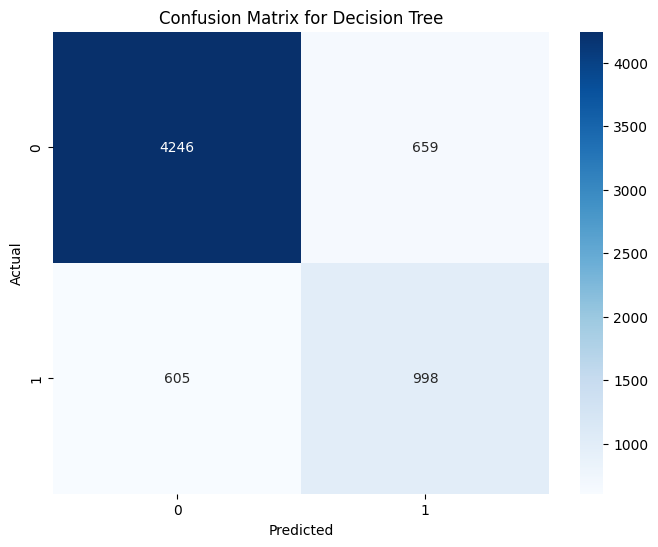

Random Forest: Accuracy = 0.8531038721573448
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4905
           1       0.74      0.63      0.68      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508



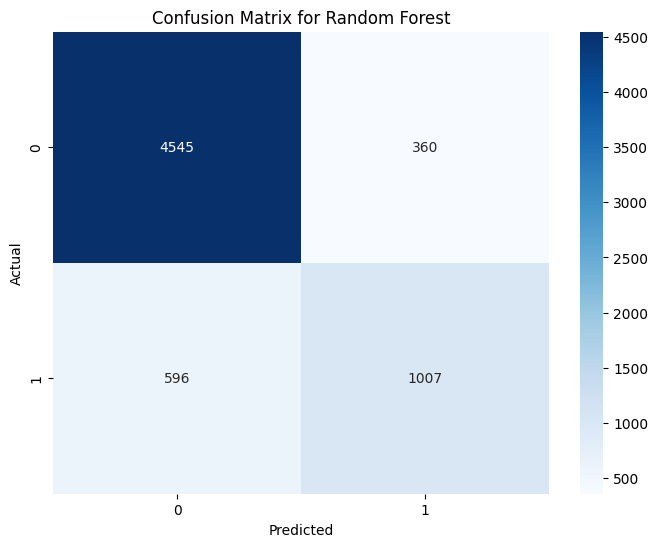

XGBoost: Accuracy = 0.8652427781192379
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4905
           1       0.76      0.66      0.71      1603

    accuracy                           0.87      6508
   macro avg       0.83      0.80      0.81      6508
weighted avg       0.86      0.87      0.86      6508



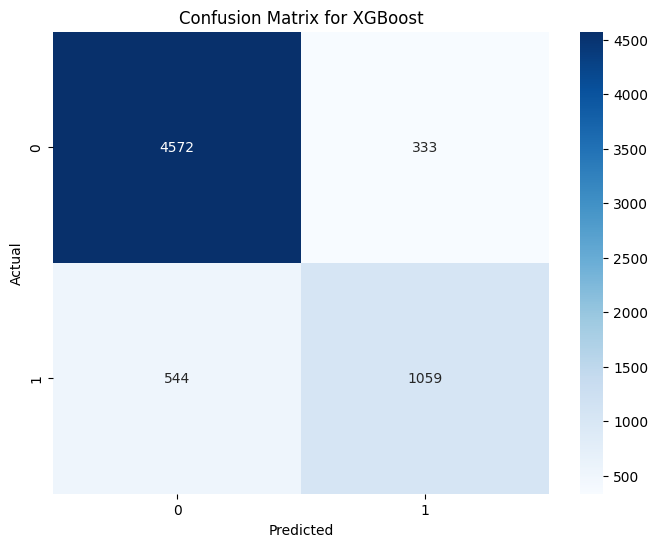

SVM: Accuracy = 0.8371235402581438
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4905
           1       0.72      0.55      0.62      1603

    accuracy                           0.84      6508
   macro avg       0.79      0.74      0.76      6508
weighted avg       0.83      0.84      0.83      6508



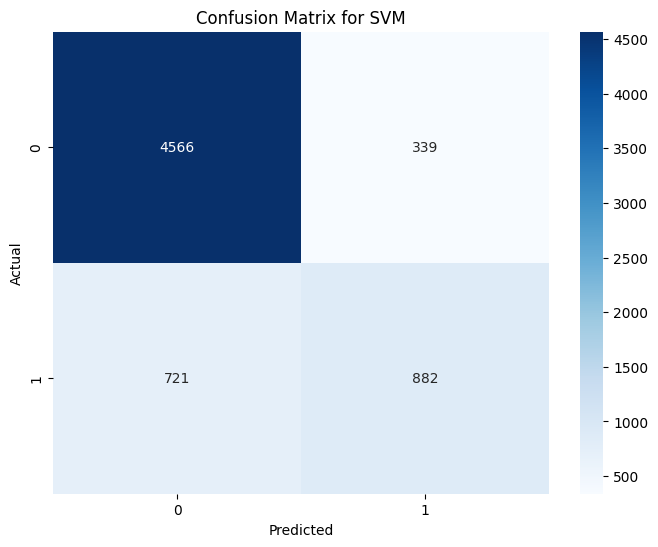

Gradient Boosting: Accuracy = 0.8658574062692072
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4905
           1       0.79      0.62      0.69      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.78      0.80      6508
weighted avg       0.86      0.87      0.86      6508



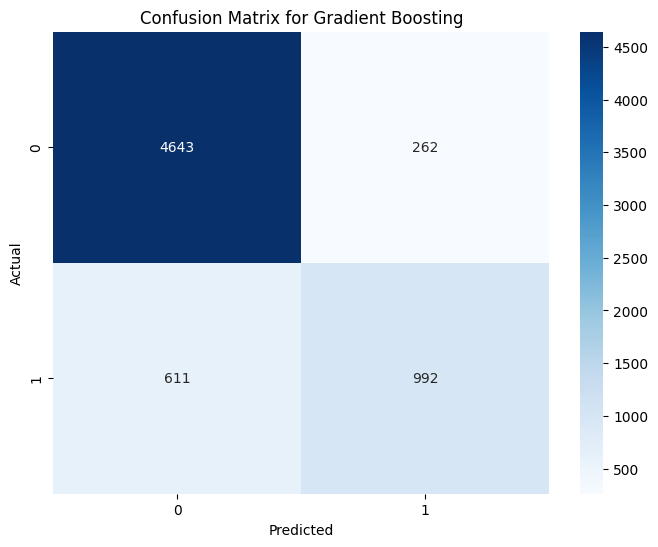

Logistic Regression: Accuracy = 0.8252919483712354
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4905
           1       0.70      0.51      0.59      1603

    accuracy                           0.83      6508
   macro avg       0.78      0.72      0.74      6508
weighted avg       0.81      0.83      0.81      6508



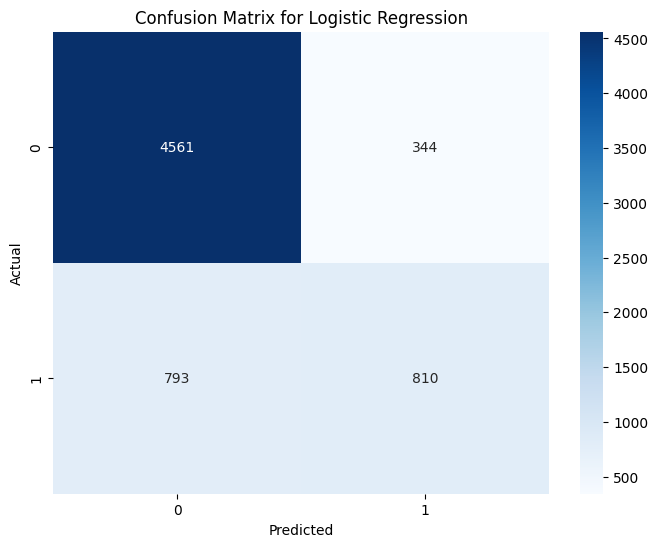

K-Nearest Neighbors: Accuracy = 0.823140749846343
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4905
           1       0.65      0.60      0.63      1603

    accuracy                           0.82      6508
   macro avg       0.76      0.75      0.76      6508
weighted avg       0.82      0.82      0.82      6508



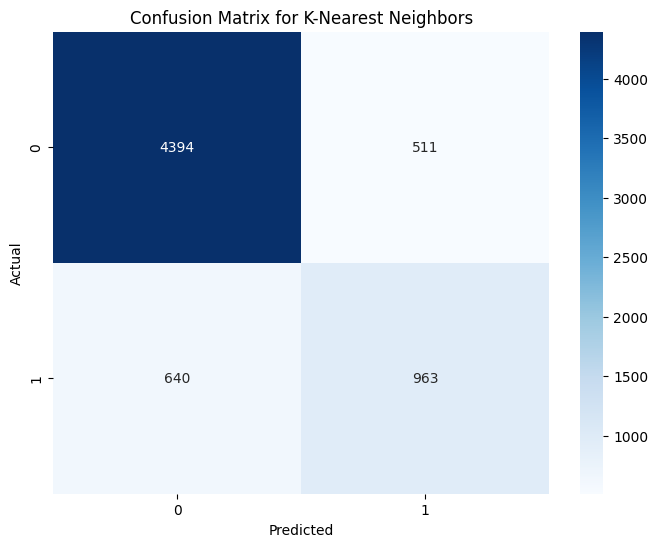

Naive Bayes: Accuracy = 0.8039336201598033
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4905
           1       0.58      0.71      0.64      1603

    accuracy                           0.80      6508
   macro avg       0.74      0.77      0.75      6508
weighted avg       0.82      0.80      0.81      6508



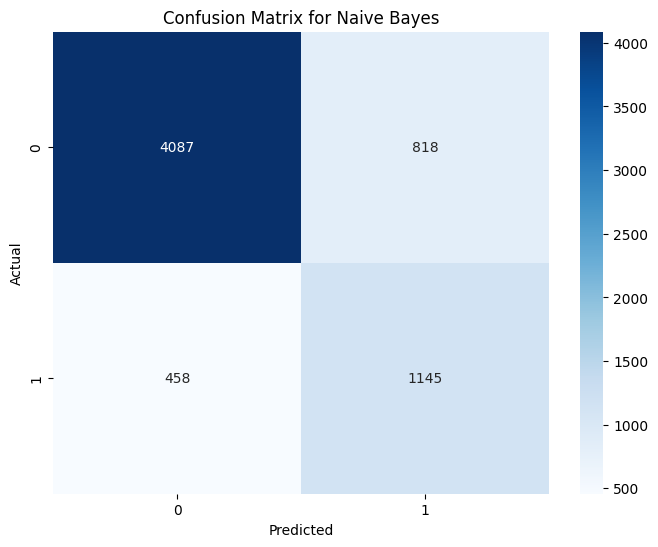

Bagging Classifier: Accuracy = 0.8418869084204057
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4905
           1       0.72      0.59      0.65      1603

    accuracy                           0.84      6508
   macro avg       0.80      0.76      0.77      6508
weighted avg       0.83      0.84      0.84      6508



In [83]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Ensemble Methods
estimators = [('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('xgb', XGBClassifier())]



# Bagging Classifier
bagging_clf = BaggingClassifier(estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test,y_pred_bagging)
print(f"Bagging Classifier: Accuracy = {accuracy_bagging}")
print(classification_report(y_test,y_pred_bagging))


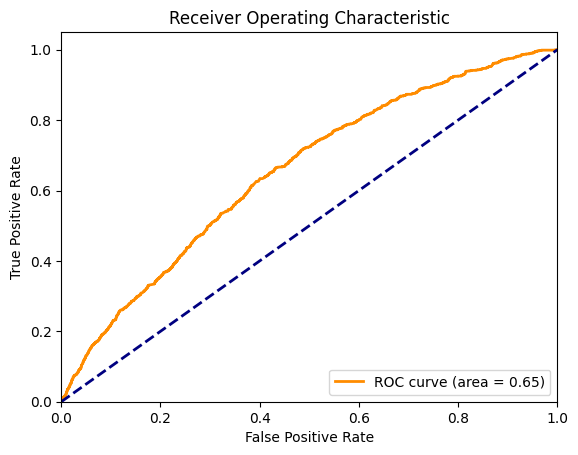

In [77]:
from sklearn.metrics import roc_curve, auc



y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


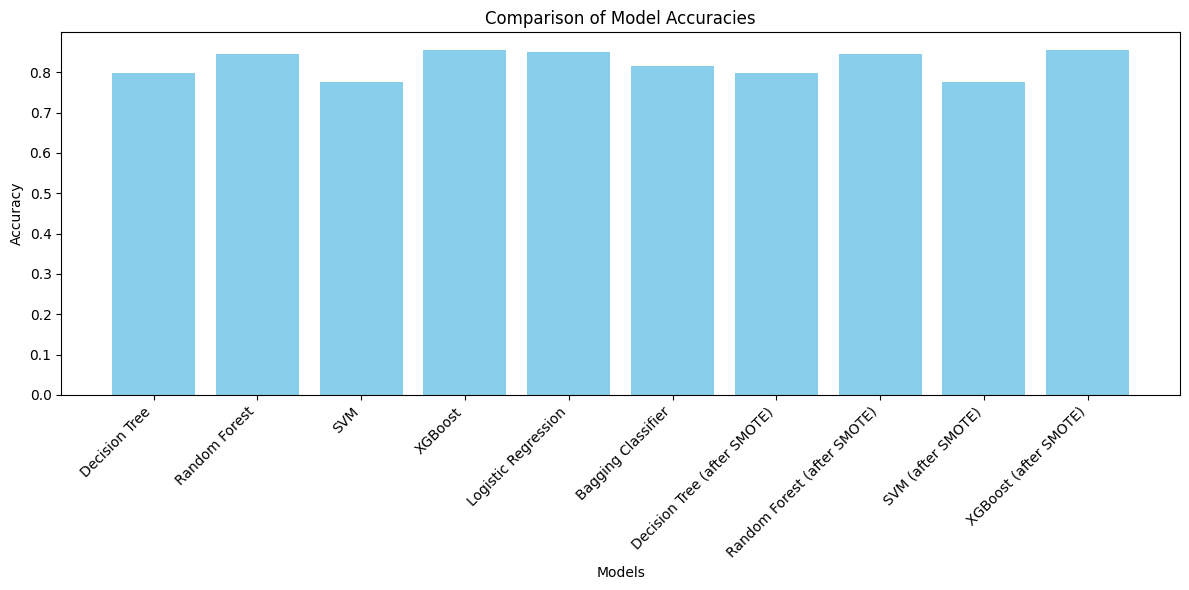

In [80]:

import matplotlib.pyplot as plt


model_accuracies = {
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
    "XGBoost": xgb_accuracy,
    "Logistic Regression": 0.85,
    "Bagging Classifier": accuracy_bagging,
    "Decision Tree (after SMOTE)": dt_accuracy,
    "Random Forest (after SMOTE)": rf_accuracy,
    "SVM (after SMOTE)": svm_accuracy,
    "XGBoost (after SMOTE)": xgb_accuracy

}

models = list(model_accuracies.keys())
accuracy_values = list(model_accuracies.values())

plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

#saving the model
import joblib
joblib.dump(best_model, 'best_model.pkl')


In [ ]:
import pickle

# Save the model using pickle
with open('income_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
Conclusion:
best_rf_model = grid_search.best_estimator_

In [1]:
final_model = best_model
final_model.fit(X, y)

NameError: name 'best_model' is not defined